# Trabalho Diciplina Machine Learning - Cleverson José Murta Galdino

A intenção deste trabalho é realizar o modelo de aprendizado de máquina para uma base de dados de um equipamento de algomeração de minério. Sendo o objeto de entrega um modelo que possa auxiliar a tomada de decisão sobre como ajustar as variáveis de processo em função das varíaves de entrada do minério. As dados obtidos vem de diferentes fontes e aprsentarem diferentes formas de exposição, como por exemplo oa granulometria, que aparece no formato de % de material retido em cada malha de peneira e também no formato de faixas de material algo mais usal na literatura sobre o assunto. Ou em relação a matéria prima que carrega consigo as informações químicas de cada uma. Sendo assim iremos gerar uma base de dados unica para garantir a organização das informações e dividi-la em 4 novas bases onde este tipo de redundancia de informação e a definição do melhor formato da informação será resolvida, atendendo a demanda do trabalho que era para utilização de duas bases distintas na elaboração do trabalho.

# Aquisição dos dados e ornganização em uma unica base

In [230]:
#Importando a Base de Dados
import pandas as pd
# Base de dados Produção
df_P = pd.read_csv('DadosMS03.csv', delimiter=';', decimal=',', encoding='latin1')
# Informações de Máquina
df_MS = pd.read_excel('Nova_base.xlsx')
# Informações de Minério
df_pilhas = pd.read_csv('pilhas.csv', delimiter=';', decimal=',', encoding='latin1')

In [231]:
df_pilhas

,ï»¿Data_pilha,MHVB,FeT MHVB,CaO MHVB,SiO2 MHVB,Al2O3 MHVB,MgO MHVB,MnT MHVB,P MHVB,TiO2 MHVB,...,MCLGA HT,MFBE,MFPV,MCLGA MC VL,MFLGA HT,MCSAFM,MPSS,MFBE T2,MFVL SEMIL,MCAVG
0,05/01/2023,MHVB 01/23,62.728435,0.124866,5.693146,1.225211,0.127256,0.765957,0.045119,0.072273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,06/01/2023,MHVB 01/23,62.728435,0.124866,5.693146,1.225211,0.127256,0.765957,0.045119,0.072273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,07/01/2023,MHVB 01/23,62.728435,0.124866,5.693146,1.225211,0.127256,0.765957,0.045119,0.072273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,08/01/2023,MHVB 01/23,62.728435,0.124866,5.693146,1.225211,0.127256,0.765957,0.045119,0.072273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,09/01/2023,MHVB 01/23,62.728435,0.124866,5.693146,1.225211,0.127256,0.765957,0.045119,0.072273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,03/07/2023,MHVB 75/23,63.311336,0.345303,5.732916,0.971000,0.196346,0.473005,0.037649,0.082142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021032
175,04/07/2023,MHVB 75/23,63.311336,0.345303,5.732916,0.971000,0.196346,0.473005,0.037649,0.082142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021032
176,05/07/2023,MHVB 75/23,63.311336,0.345303,5.732916,0.971000,0.196346,0.473005,0.037649,0.082142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021032
177,06/07/2023,MHVB 75/23,63.311336,0.345303,5.732916,0.971000,0.196346,0.473005,0.037649,0.082142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021032


In [232]:
df_pilhas.columns = ['Date', 'MHVB', 'FeT MHVB', 'CaO MHVB', 'SiO2 MHVB',
       'Al2O3 MHVB', 'MgO MHVB', 'MnT MHVB', 'P MHVB', 'TiO2 MHVB', 'FeO MHVB',
       'PPC MHVB', 'CF MHVB', '8,00 MHVB', '6,30 MHVB', '4,75 MHVB',
       '2,80 MHVB', '2,00 MHVB', '1,00 MHVB', '0,500 MHVB', '0,250 MHVB',
       '0,150 MHVB', '0,125 MHVB', '0,106 MHVB', '0,063 MHVB', '0,045 MHVB',
       'FUNDO MHVB', '>2,80 MHVB', '>1,00 MHVB', '>0,25 MHVB', '<0,125 MHVB',
       '<0,045 MHVB', '>6,3 MHVB', '<0,150 MHVB', 'LXIN', 'MCJM',
       'MCLGA AC', 'MFBU1', 'MFLGA VL', 'MFMTP', 'MFVL', 'MFVA',
       'MCLGA VLN', 'MFIB', 'MFSMB', 'MFBU 2', 'MFLGAVLN', 'MFVO', 'MFSAFM',
       'MFGG', 'MPBU', 'MPBU2', 'MCLGA HT', 'MFBE', 'MFPV',
       'MCLGA MC VL', 'MFLGA HT', 'MCSAFM', 'MPSS', 'MFBE T2', 'MFVL SEMIL',
       'MCAVG']

In [233]:
df_P

,Date,BED DEPTH CONTROL SETPOINT (mm),Posição calculada da queima atual (m),Speed-Nine,PRODUCT WEIGHT S207 (t/h)
0,01/01/2023 00:00,600.0,36.00,0.332724,231.63
1,01/01/2023 01:00,600.0,35.95,0.333333,237.95
2,01/01/2023 02:00,600.0,35.79,0.332731,233.66
3,01/01/2023 03:00,600.0,35.51,0.333333,231.49
4,01/01/2023 04:00,600.0,29.73,0.332110,231.52
...,...,...,...,...,...
4339,30/06/2023 19:00,600.0,36.84,0.332784,240.64
4340,30/06/2023 20:00,600.0,32.55,0.333333,223.77
4341,30/06/2023 21:00,600.0,32.41,0.334118,127.04
4342,30/06/2023 22:00,600.0,31.44,0.329331,249.73


In [234]:
df_MS

,Date,1# Iron ore feed rate(t/h),2# Iron ore feed rate(t/h),3# Iron ore feed rate(t/h),4# Iron ore feed rate(t/h),5# Iron ore feed rate(t/h),6# Lime stone feed rate(t/h),7# Lime stone feed rate(t/h),8# Serpentinite feed rate(t/h),9# Manganese feed rate(t/h),...,115 FEEDER MOISTRUE SETPOINT(%),116 FEEDER MOISTRUE SETPOINT(%),Primary Mixer water flow(t/h),Secondary Mixer water flow(t/h),Mixing bins feed rate(t/h),material weight in zone A(t/h),PRODUCT TO BF WEIGHT M201(t/h),Adição total de água à mistura bruta(t/h),Pyrometer AC17(Deg C),Pyrometer TCM203(Deg C)
0,2023-01-01 00:00:00,64.176992,0.000000,64.142167,0.000000,65.391208,15.922917,10.983250,2.860075,0.0,...,20.200,15.0,4.470108,0.001750,398.924433,389.997808,394.173958,4.472292,28.964650,33.640200
1,2023-01-01 01:00:00,67.922767,0.000000,67.939292,0.000000,69.089592,16.857025,11.632675,3.032858,0.0,...,20.200,15.0,4.480925,0.001525,411.238617,413.167842,414.710108,4.481733,29.786250,35.278308
2,2023-01-01 02:00:00,69.331517,0.000000,69.173467,0.000000,70.577783,17.189067,11.864733,3.097867,0.0,...,20.200,15.0,4.483775,0.001525,414.169133,422.311692,422.530733,4.485750,29.286775,34.482542
3,2023-01-01 03:00:00,65.385575,0.000000,65.240575,0.000000,66.500825,16.193542,11.180442,2.911708,0.0,...,20.200,15.0,4.481767,0.001067,393.483625,398.767092,398.334608,4.482958,30.137567,34.897333
4,2023-01-01 04:00:00,59.568125,0.000000,56.893283,0.000000,60.834642,14.767125,10.195208,2.649992,0.0,...,20.200,15.0,4.462675,0.001350,378.024867,359.072083,357.948283,4.463583,30.543917,35.066675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,2023-06-30 19:00:00,68.207692,0.000000,68.217633,68.257983,68.353342,0.000000,25.895883,5.729992,0.0,...,13.000,9.5,18.097417,5.186692,421.830908,518.087000,497.431525,23.286367,30.721867,38.461333
4340,2023-06-30 20:00:00,45.473717,0.000000,45.427225,45.443442,45.497608,0.000000,17.586642,3.802375,0.0,...,13.000,9.5,12.347575,4.322667,359.796867,373.297275,326.078417,16.528833,30.789408,37.665600
4341,2023-06-30 21:00:00,44.928233,0.000000,44.976333,44.953150,44.992542,0.000000,17.389500,3.764808,0.0,...,13.000,9.5,12.467533,3.495075,287.458525,457.239475,327.378267,15.965467,28.228583,35.779917
4342,2023-06-30 22:00:00,65.452183,0.000000,38.727142,65.579975,65.758883,0.000000,22.772975,4.943425,0.0,...,14.265,9.8,15.538733,4.380675,388.195033,517.831383,428.665108,19.708517,28.105817,35.437042


In [235]:
# Corrigindo as datas dos df's
df_P['Date'] = pd.to_datetime(df_P['Date'])
df_MS['Date'] = pd.to_datetime(df_MS['Date'])
df_pilhas['Date'] = pd.to_datetime(df_pilhas['Date'])

<ipython-input-235-2d72208bd068>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_pilhas['Date'] = pd.to_datetime(df_pilhas['Date'])


In [236]:
df_MS

,Date,1# Iron ore feed rate(t/h),2# Iron ore feed rate(t/h),3# Iron ore feed rate(t/h),4# Iron ore feed rate(t/h),5# Iron ore feed rate(t/h),6# Lime stone feed rate(t/h),7# Lime stone feed rate(t/h),8# Serpentinite feed rate(t/h),9# Manganese feed rate(t/h),...,115 FEEDER MOISTRUE SETPOINT(%),116 FEEDER MOISTRUE SETPOINT(%),Primary Mixer water flow(t/h),Secondary Mixer water flow(t/h),Mixing bins feed rate(t/h),material weight in zone A(t/h),PRODUCT TO BF WEIGHT M201(t/h),Adição total de água à mistura bruta(t/h),Pyrometer AC17(Deg C),Pyrometer TCM203(Deg C)
0,2023-01-01 00:00:00,64.176992,0.000000,64.142167,0.000000,65.391208,15.922917,10.983250,2.860075,0.0,...,20.200,15.0,4.470108,0.001750,398.924433,389.997808,394.173958,4.472292,28.964650,33.640200
1,2023-01-01 01:00:00,67.922767,0.000000,67.939292,0.000000,69.089592,16.857025,11.632675,3.032858,0.0,...,20.200,15.0,4.480925,0.001525,411.238617,413.167842,414.710108,4.481733,29.786250,35.278308
2,2023-01-01 02:00:00,69.331517,0.000000,69.173467,0.000000,70.577783,17.189067,11.864733,3.097867,0.0,...,20.200,15.0,4.483775,0.001525,414.169133,422.311692,422.530733,4.485750,29.286775,34.482542
3,2023-01-01 03:00:00,65.385575,0.000000,65.240575,0.000000,66.500825,16.193542,11.180442,2.911708,0.0,...,20.200,15.0,4.481767,0.001067,393.483625,398.767092,398.334608,4.482958,30.137567,34.897333
4,2023-01-01 04:00:00,59.568125,0.000000,56.893283,0.000000,60.834642,14.767125,10.195208,2.649992,0.0,...,20.200,15.0,4.462675,0.001350,378.024867,359.072083,357.948283,4.463583,30.543917,35.066675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,2023-06-30 19:00:00,68.207692,0.000000,68.217633,68.257983,68.353342,0.000000,25.895883,5.729992,0.0,...,13.000,9.5,18.097417,5.186692,421.830908,518.087000,497.431525,23.286367,30.721867,38.461333
4340,2023-06-30 20:00:00,45.473717,0.000000,45.427225,45.443442,45.497608,0.000000,17.586642,3.802375,0.0,...,13.000,9.5,12.347575,4.322667,359.796867,373.297275,326.078417,16.528833,30.789408,37.665600
4341,2023-06-30 21:00:00,44.928233,0.000000,44.976333,44.953150,44.992542,0.000000,17.389500,3.764808,0.0,...,13.000,9.5,12.467533,3.495075,287.458525,457.239475,327.378267,15.965467,28.228583,35.779917
4342,2023-06-30 22:00:00,65.452183,0.000000,38.727142,65.579975,65.758883,0.000000,22.772975,4.943425,0.0,...,14.265,9.8,15.538733,4.380675,388.195033,517.831383,428.665108,19.708517,28.105817,35.437042


In [237]:
from pandas.core.reshape.merge import merge
df_Merge = df_P.merge(df_MS,left_on='Date', right_on='Date', how='left')

In [238]:
df_Merge

,Date,BED DEPTH CONTROL SETPOINT (mm),Posição calculada da queima atual (m),Speed-Nine,PRODUCT WEIGHT S207 (t/h),1# Iron ore feed rate(t/h),2# Iron ore feed rate(t/h),3# Iron ore feed rate(t/h),4# Iron ore feed rate(t/h),5# Iron ore feed rate(t/h),...,115 FEEDER MOISTRUE SETPOINT(%),116 FEEDER MOISTRUE SETPOINT(%),Primary Mixer water flow(t/h),Secondary Mixer water flow(t/h),Mixing bins feed rate(t/h),material weight in zone A(t/h),PRODUCT TO BF WEIGHT M201(t/h),Adição total de água à mistura bruta(t/h),Pyrometer AC17(Deg C),Pyrometer TCM203(Deg C)
0,2023-01-01 00:00:00,600.0,36.00,0.332724,231.63,64.176992,0.000000,64.142167,0.000000,65.391208,...,20.200,15.0,4.470108,0.001750,398.924433,389.997808,394.173958,4.472292,28.964650,33.640200
1,2023-01-01 01:00:00,600.0,35.95,0.333333,237.95,67.922767,0.000000,67.939292,0.000000,69.089592,...,20.200,15.0,4.480925,0.001525,411.238617,413.167842,414.710108,4.481733,29.786250,35.278308
2,2023-01-01 02:00:00,600.0,35.79,0.332731,233.66,69.331517,0.000000,69.173467,0.000000,70.577783,...,20.200,15.0,4.483775,0.001525,414.169133,422.311692,422.530733,4.485750,29.286775,34.482542
3,2023-01-01 03:00:00,600.0,35.51,0.333333,231.49,65.385575,0.000000,65.240575,0.000000,66.500825,...,20.200,15.0,4.481767,0.001067,393.483625,398.767092,398.334608,4.482958,30.137567,34.897333
4,2023-01-01 04:00:00,600.0,29.73,0.332110,231.52,59.568125,0.000000,56.893283,0.000000,60.834642,...,20.200,15.0,4.462675,0.001350,378.024867,359.072083,357.948283,4.463583,30.543917,35.066675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,2023-06-30 19:00:00,600.0,36.84,0.332784,240.64,68.207692,0.000000,68.217633,68.257983,68.353342,...,13.000,9.5,18.097417,5.186692,421.830908,518.087000,497.431525,23.286367,30.721867,38.461333
4340,2023-06-30 20:00:00,600.0,32.55,0.333333,223.77,45.473717,0.000000,45.427225,45.443442,45.497608,...,13.000,9.5,12.347575,4.322667,359.796867,373.297275,326.078417,16.528833,30.789408,37.665600
4341,2023-06-30 21:00:00,600.0,32.41,0.334118,127.04,44.928233,0.000000,44.976333,44.953150,44.992542,...,13.000,9.5,12.467533,3.495075,287.458525,457.239475,327.378267,15.965467,28.228583,35.779917
4342,2023-06-30 22:00:00,600.0,31.44,0.329331,249.73,65.452183,0.000000,38.727142,65.579975,65.758883,...,14.265,9.8,15.538733,4.380675,388.195033,517.831383,428.665108,19.708517,28.105817,35.437042


In [239]:
# Criando o df que servirá de base para o nosso trabalho
df_base = df_Merge.merge(df_pilhas,left_on='Date', right_on='Date', how='left')

In [240]:
df_base

,Date,BED DEPTH CONTROL SETPOINT (mm),Posição calculada da queima atual (m),Speed-Nine,PRODUCT WEIGHT S207 (t/h),1# Iron ore feed rate(t/h),2# Iron ore feed rate(t/h),3# Iron ore feed rate(t/h),4# Iron ore feed rate(t/h),5# Iron ore feed rate(t/h),...,MCLGA HT,MFBE,MFPV,MCLGA MC VL,MFLGA HT,MCSAFM,MPSS,MFBE T2,MFVL SEMIL,MCAVG
0,2023-01-01 00:00:00,600.0,36.00,0.332724,231.63,64.176992,0.000000,64.142167,0.000000,65.391208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-01 01:00:00,600.0,35.95,0.333333,237.95,67.922767,0.000000,67.939292,0.000000,69.089592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-01 02:00:00,600.0,35.79,0.332731,233.66,69.331517,0.000000,69.173467,0.000000,70.577783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-01 03:00:00,600.0,35.51,0.333333,231.49,65.385575,0.000000,65.240575,0.000000,66.500825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-01-01 04:00:00,600.0,29.73,0.332110,231.52,59.568125,0.000000,56.893283,0.000000,60.834642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,2023-06-30 19:00:00,600.0,36.84,0.332784,240.64,68.207692,0.000000,68.217633,68.257983,68.353342,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4340,2023-06-30 20:00:00,600.0,32.55,0.333333,223.77,45.473717,0.000000,45.427225,45.443442,45.497608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4341,2023-06-30 21:00:00,600.0,32.41,0.334118,127.04,44.928233,0.000000,44.976333,44.953150,44.992542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4342,2023-06-30 22:00:00,600.0,31.44,0.329331,249.73,65.452183,0.000000,38.727142,65.579975,65.758883,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [241]:
df_base.tail(800)

,Date,BED DEPTH CONTROL SETPOINT (mm),Posição calculada da queima atual (m),Speed-Nine,PRODUCT WEIGHT S207 (t/h),1# Iron ore feed rate(t/h),2# Iron ore feed rate(t/h),3# Iron ore feed rate(t/h),4# Iron ore feed rate(t/h),5# Iron ore feed rate(t/h),...,MCLGA HT,MFBE,MFPV,MCLGA MC VL,MFLGA HT,MCSAFM,MPSS,MFBE T2,MFVL SEMIL,MCAVG
3544,2023-05-28 16:00:00,600.0,28.50,0.332710,244.57,40.166425,40.188800,40.071500,40.174042,40.184425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3545,2023-05-28 17:00:00,600.0,30.38,0.333910,244.82,44.825808,44.854050,44.836708,44.871958,44.841517,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3546,2023-05-28 18:00:00,600.0,28.84,0.333898,256.59,49.309608,49.327833,49.304375,49.367850,49.326583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3547,2023-05-28 19:00:00,600.0,28.90,0.333333,265.56,46.049833,46.086525,46.093583,46.071267,46.071275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3548,2023-05-28 20:00:00,600.0,28.61,0.333333,237.08,44.555692,44.574000,44.533075,44.603258,44.613283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,2023-06-30 19:00:00,600.0,36.84,0.332784,240.64,68.207692,0.000000,68.217633,68.257983,68.353342,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4340,2023-06-30 20:00:00,600.0,32.55,0.333333,223.77,45.473717,0.000000,45.427225,45.443442,45.497608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4341,2023-06-30 21:00:00,600.0,32.41,0.334118,127.04,44.928233,0.000000,44.976333,44.953150,44.992542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4342,2023-06-30 22:00:00,600.0,31.44,0.329331,249.73,65.452183,0.000000,38.727142,65.579975,65.758883,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
df_base.describe()

,BED DEPTH CONTROL SETPOINT (mm),Posição calculada da queima atual (m),Speed-Nine,PRODUCT WEIGHT S207 (t/h),1# Iron ore feed rate(t/h),2# Iron ore feed rate(t/h),3# Iron ore feed rate(t/h),4# Iron ore feed rate(t/h),5# Iron ore feed rate(t/h),6# Lime stone feed rate(t/h),...,MCLGA HT,MFBE,MFPV,MCLGA MC VL,MFLGA HT,MCSAFM,MPSS,MFBE T2,MFVL SEMIL,MCAVG
count,4344.000000,4344.000000,4344.000000,4344.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,592.747311,32.742571,0.339710,216.202926,38.701760,9.571108,50.955771,50.644842,48.959076,8.072087,...,0.010769,0.009910,0.006339,0.008089,0.008677,0.004397,0.012755,0.004233,0.003549,0.007129
std,14.536082,6.517836,0.100691,61.735144,24.345197,18.861741,17.318929,17.978073,16.892439,5.072862,...,0.026298,0.025764,0.033438,0.020893,0.025030,0.009993,0.033811,0.011764,0.009533,0.021133
min,550.000000,28.500000,0.000000,-0.540000,-0.418542,0.000000,0.000000,-0.154675,0.000000,-0.019750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,580.000000,29.260000,0.332759,210.350000,4.592975,0.000000,46.545690,46.607871,44.228844,1.854048,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,600.000000,31.025000,0.333333,227.125000,48.356437,0.000000,53.092479,53.029571,50.997100,9.851604,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,600.000000,33.292500,0.334071,246.277500,54.561979,0.000000,60.689485,60.900985,58.153177,11.280238,...,0.000000,0.000000,0.000000,0.004004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,630.000000,58.430000,0.573333,335.660000,128.867742,75.603308,115.258092,108.996983,120.479300,20.484092,...,0.110398,0.106460,0.181710,0.108099,0.091448,0.033905,0.146242,0.048529,0.036858,0.094717


In [243]:
df_base.duplicated().value_counts()

False    4344
dtype: int64

In [244]:
df_base.isna().sum()

Date                                         0
  BED DEPTH CONTROL SETPOINT (mm)            0
 Posição calculada da queima atual (m)       0
Speed-Nine                                   0
PRODUCT WEIGHT S207 (t/h)                    0
                                          ... 
MCSAFM                                    4172
MPSS                                      4172
MFBE T2                                   4172
MFVL SEMIL                                4172
MCAVG                                     4172
Length: 103, dtype: int64

In [245]:
merged1_df = df_P.join(df_MS.set_index('Date'),on='Date')
merged1_df

,Date,BED DEPTH CONTROL SETPOINT (mm),Posição calculada da queima atual (m),Speed-Nine,PRODUCT WEIGHT S207 (t/h),1# Iron ore feed rate(t/h),2# Iron ore feed rate(t/h),3# Iron ore feed rate(t/h),4# Iron ore feed rate(t/h),5# Iron ore feed rate(t/h),...,115 FEEDER MOISTRUE SETPOINT(%),116 FEEDER MOISTRUE SETPOINT(%),Primary Mixer water flow(t/h),Secondary Mixer water flow(t/h),Mixing bins feed rate(t/h),material weight in zone A(t/h),PRODUCT TO BF WEIGHT M201(t/h),Adição total de água à mistura bruta(t/h),Pyrometer AC17(Deg C),Pyrometer TCM203(Deg C)
0,2023-01-01 00:00:00,600.0,36.00,0.332724,231.63,64.176992,0.000000,64.142167,0.000000,65.391208,...,20.200,15.0,4.470108,0.001750,398.924433,389.997808,394.173958,4.472292,28.964650,33.640200
1,2023-01-01 01:00:00,600.0,35.95,0.333333,237.95,67.922767,0.000000,67.939292,0.000000,69.089592,...,20.200,15.0,4.480925,0.001525,411.238617,413.167842,414.710108,4.481733,29.786250,35.278308
2,2023-01-01 02:00:00,600.0,35.79,0.332731,233.66,69.331517,0.000000,69.173467,0.000000,70.577783,...,20.200,15.0,4.483775,0.001525,414.169133,422.311692,422.530733,4.485750,29.286775,34.482542
3,2023-01-01 03:00:00,600.0,35.51,0.333333,231.49,65.385575,0.000000,65.240575,0.000000,66.500825,...,20.200,15.0,4.481767,0.001067,393.483625,398.767092,398.334608,4.482958,30.137567,34.897333
4,2023-01-01 04:00:00,600.0,29.73,0.332110,231.52,59.568125,0.000000,56.893283,0.000000,60.834642,...,20.200,15.0,4.462675,0.001350,378.024867,359.072083,357.948283,4.463583,30.543917,35.066675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,2023-06-30 19:00:00,600.0,36.84,0.332784,240.64,68.207692,0.000000,68.217633,68.257983,68.353342,...,13.000,9.5,18.097417,5.186692,421.830908,518.087000,497.431525,23.286367,30.721867,38.461333
4340,2023-06-30 20:00:00,600.0,32.55,0.333333,223.77,45.473717,0.000000,45.427225,45.443442,45.497608,...,13.000,9.5,12.347575,4.322667,359.796867,373.297275,326.078417,16.528833,30.789408,37.665600
4341,2023-06-30 21:00:00,600.0,32.41,0.334118,127.04,44.928233,0.000000,44.976333,44.953150,44.992542,...,13.000,9.5,12.467533,3.495075,287.458525,457.239475,327.378267,15.965467,28.228583,35.779917
4342,2023-06-30 22:00:00,600.0,31.44,0.329331,249.73,65.452183,0.000000,38.727142,65.579975,65.758883,...,14.265,9.8,15.538733,4.380675,388.195033,517.831383,428.665108,19.708517,28.105817,35.437042


In [246]:
#merged1_df['Date'] = pd.to_datetime(merged1_df['Date'])

In [247]:
#merged1_df['Date'] = merged1_df['Date'].dt.date

In [248]:
merged1_df

,Date,BED DEPTH CONTROL SETPOINT (mm),Posição calculada da queima atual (m),Speed-Nine,PRODUCT WEIGHT S207 (t/h),1# Iron ore feed rate(t/h),2# Iron ore feed rate(t/h),3# Iron ore feed rate(t/h),4# Iron ore feed rate(t/h),5# Iron ore feed rate(t/h),...,115 FEEDER MOISTRUE SETPOINT(%),116 FEEDER MOISTRUE SETPOINT(%),Primary Mixer water flow(t/h),Secondary Mixer water flow(t/h),Mixing bins feed rate(t/h),material weight in zone A(t/h),PRODUCT TO BF WEIGHT M201(t/h),Adição total de água à mistura bruta(t/h),Pyrometer AC17(Deg C),Pyrometer TCM203(Deg C)
0,2023-01-01 00:00:00,600.0,36.00,0.332724,231.63,64.176992,0.000000,64.142167,0.000000,65.391208,...,20.200,15.0,4.470108,0.001750,398.924433,389.997808,394.173958,4.472292,28.964650,33.640200
1,2023-01-01 01:00:00,600.0,35.95,0.333333,237.95,67.922767,0.000000,67.939292,0.000000,69.089592,...,20.200,15.0,4.480925,0.001525,411.238617,413.167842,414.710108,4.481733,29.786250,35.278308
2,2023-01-01 02:00:00,600.0,35.79,0.332731,233.66,69.331517,0.000000,69.173467,0.000000,70.577783,...,20.200,15.0,4.483775,0.001525,414.169133,422.311692,422.530733,4.485750,29.286775,34.482542
3,2023-01-01 03:00:00,600.0,35.51,0.333333,231.49,65.385575,0.000000,65.240575,0.000000,66.500825,...,20.200,15.0,4.481767,0.001067,393.483625,398.767092,398.334608,4.482958,30.137567,34.897333
4,2023-01-01 04:00:00,600.0,29.73,0.332110,231.52,59.568125,0.000000,56.893283,0.000000,60.834642,...,20.200,15.0,4.462675,0.001350,378.024867,359.072083,357.948283,4.463583,30.543917,35.066675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,2023-06-30 19:00:00,600.0,36.84,0.332784,240.64,68.207692,0.000000,68.217633,68.257983,68.353342,...,13.000,9.5,18.097417,5.186692,421.830908,518.087000,497.431525,23.286367,30.721867,38.461333
4340,2023-06-30 20:00:00,600.0,32.55,0.333333,223.77,45.473717,0.000000,45.427225,45.443442,45.497608,...,13.000,9.5,12.347575,4.322667,359.796867,373.297275,326.078417,16.528833,30.789408,37.665600
4341,2023-06-30 21:00:00,600.0,32.41,0.334118,127.04,44.928233,0.000000,44.976333,44.953150,44.992542,...,13.000,9.5,12.467533,3.495075,287.458525,457.239475,327.378267,15.965467,28.228583,35.779917
4342,2023-06-30 22:00:00,600.0,31.44,0.329331,249.73,65.452183,0.000000,38.727142,65.579975,65.758883,...,14.265,9.8,15.538733,4.380675,388.195033,517.831383,428.665108,19.708517,28.105817,35.437042


In [249]:
import pandas as pd

# Convertendo a coluna 'Date' dos df's
merged1_df['Date'] = merged1_df['Date'].dt.date

df_pilhas['Date'] = pd.to_datetime(df_pilhas['Date']).dt.date

# Realizando o merge com df_pilhas à direita e replicando as informações para cada data
merged_df = merged1_df.merge(df_pilhas.set_index('Date'), left_on='Date', right_index=True, how='left')

merged_df

,Date,BED DEPTH CONTROL SETPOINT (mm),Posição calculada da queima atual (m),Speed-Nine,PRODUCT WEIGHT S207 (t/h),1# Iron ore feed rate(t/h),2# Iron ore feed rate(t/h),3# Iron ore feed rate(t/h),4# Iron ore feed rate(t/h),5# Iron ore feed rate(t/h),...,MCLGA HT,MFBE,MFPV,MCLGA MC VL,MFLGA HT,MCSAFM,MPSS,MFBE T2,MFVL SEMIL,MCAVG
0,2023-01-01,600.0,36.00,0.332724,231.63,64.176992,0.000000,64.142167,0.000000,65.391208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-01,600.0,35.95,0.333333,237.95,67.922767,0.000000,67.939292,0.000000,69.089592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-01,600.0,35.79,0.332731,233.66,69.331517,0.000000,69.173467,0.000000,70.577783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-01,600.0,35.51,0.333333,231.49,65.385575,0.000000,65.240575,0.000000,66.500825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-01-01,600.0,29.73,0.332110,231.52,59.568125,0.000000,56.893283,0.000000,60.834642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,2023-06-30,600.0,36.84,0.332784,240.64,68.207692,0.000000,68.217633,68.257983,68.353342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021032
4340,2023-06-30,600.0,32.55,0.333333,223.77,45.473717,0.000000,45.427225,45.443442,45.497608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021032
4341,2023-06-30,600.0,32.41,0.334118,127.04,44.928233,0.000000,44.976333,44.953150,44.992542,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021032
4342,2023-06-30,600.0,31.44,0.329331,249.73,65.452183,0.000000,38.727142,65.579975,65.758883,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021032


In [250]:
merged_df.describe()

,BED DEPTH CONTROL SETPOINT (mm),Posição calculada da queima atual (m),Speed-Nine,PRODUCT WEIGHT S207 (t/h),1# Iron ore feed rate(t/h),2# Iron ore feed rate(t/h),3# Iron ore feed rate(t/h),4# Iron ore feed rate(t/h),5# Iron ore feed rate(t/h),6# Lime stone feed rate(t/h),...,MCLGA HT,MFBE,MFPV,MCLGA MC VL,MFLGA HT,MCSAFM,MPSS,MFBE T2,MFVL SEMIL,MCAVG
count,4344.000000,4344.000000,4344.000000,4344.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,...,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,592.747311,32.742571,0.339710,216.202926,38.701760,9.571108,50.955771,50.644842,48.959076,8.072087,...,0.010769,0.009910,0.006339,0.008089,0.008677,0.004397,0.012755,0.004233,0.003549,0.007129
std,14.536082,6.517836,0.100691,61.735144,24.345197,18.861741,17.318929,17.978073,16.892439,5.072862,...,0.026225,0.025692,0.033345,0.020834,0.024960,0.009965,0.033716,0.011731,0.009506,0.021075
min,550.000000,28.500000,0.000000,-0.540000,-0.418542,0.000000,0.000000,-0.154675,0.000000,-0.019750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,580.000000,29.260000,0.332759,210.350000,4.592975,0.000000,46.545690,46.607871,44.228844,1.854048,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,600.000000,31.025000,0.333333,227.125000,48.356437,0.000000,53.092479,53.029571,50.997100,9.851604,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,600.000000,33.292500,0.334071,246.277500,54.561979,0.000000,60.689485,60.900985,58.153177,11.280238,...,0.000000,0.000000,0.000000,0.004004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,630.000000,58.430000,0.573333,335.660000,128.867742,75.603308,115.258092,108.996983,120.479300,20.484092,...,0.110398,0.106460,0.181710,0.108099,0.091448,0.033905,0.146242,0.048529,0.036858,0.094717


# Verificando Dados Faltantes e redundandes

In [251]:
merged_df.duplicated().value_counts()

False    4312
True       32
dtype: int64

In [252]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Columns: 103 entries, Date to MCAVG
dtypes: float64(101), object(2)
memory usage: 3.4+ MB


In [253]:
nan_counts = merged_df.isna().sum()
print(nan_counts.to_string())


Date                                           0
  BED DEPTH CONTROL SETPOINT (mm)              0
 Posição calculada da queima atual (m)         0
Speed-Nine                                     0
PRODUCT WEIGHT S207 (t/h)                      0
1# Iron ore feed rate(t/h)                   864
2# Iron ore feed rate(t/h)                   864
3# Iron ore feed rate(t/h)                   864
4# Iron ore feed rate(t/h)                   864
5# Iron ore feed rate(t/h)                   864
6# Lime stone feed rate(t/h)                 864
7# Lime stone feed rate(t/h)                 864
8# Serpentinite feed rate(t/h)               864
9# Manganese feed rate(t/h)                  864
10# BF fines feed rate(t/h)                  864
11# Returned ore feed rate(t/h)              864
12# Returned ore feed rate(t/h)              864
13# Dust ash feed rate(t/h)                  864
14A# Burnt lime feed rate(t/h)               864
14B# Burnt lime feed rate(t/h)               864
15# Coke breeze feed

In [254]:
# Exclusão das linhas com dados faltantes
merged_df = merged_df.dropna()
merged_df

,Date,BED DEPTH CONTROL SETPOINT (mm),Posição calculada da queima atual (m),Speed-Nine,PRODUCT WEIGHT S207 (t/h),1# Iron ore feed rate(t/h),2# Iron ore feed rate(t/h),3# Iron ore feed rate(t/h),4# Iron ore feed rate(t/h),5# Iron ore feed rate(t/h),...,MCLGA HT,MFBE,MFPV,MCLGA MC VL,MFLGA HT,MCSAFM,MPSS,MFBE T2,MFVL SEMIL,MCAVG
96,2023-05-01,600.0,31.51,0.332703,220.47,62.351950,0.000000,89.387083,62.343958,35.277858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
97,2023-05-01,600.0,32.00,0.333955,229.82,59.688408,0.000000,85.561892,59.678375,33.819325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
98,2023-05-01,600.0,33.53,0.333962,225.28,57.881908,0.000000,83.036100,57.995158,32.814000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
99,2023-05-01,600.0,33.63,0.333333,244.68,51.588808,0.000000,54.006200,51.605817,49.088508,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
100,2023-05-01,600.0,30.35,0.333333,217.47,45.951400,0.000000,47.082142,46.044758,44.933892,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,2023-06-30,600.0,36.84,0.332784,240.64,68.207692,0.000000,68.217633,68.257983,68.353342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021032
4340,2023-06-30,600.0,32.55,0.333333,223.77,45.473717,0.000000,45.427225,45.443442,45.497608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021032
4341,2023-06-30,600.0,32.41,0.334118,127.04,44.928233,0.000000,44.976333,44.953150,44.992542,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021032
4342,2023-06-30,600.0,31.44,0.329331,249.73,65.452183,0.000000,38.727142,65.579975,65.758883,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021032


In [255]:
merged_df.describe()

,BED DEPTH CONTROL SETPOINT (mm),Posição calculada da queima atual (m),Speed-Nine,PRODUCT WEIGHT S207 (t/h),1# Iron ore feed rate(t/h),2# Iron ore feed rate(t/h),3# Iron ore feed rate(t/h),4# Iron ore feed rate(t/h),5# Iron ore feed rate(t/h),6# Lime stone feed rate(t/h),...,MCLGA HT,MFBE,MFPV,MCLGA MC VL,MFLGA HT,MCSAFM,MPSS,MFBE T2,MFVL SEMIL,MCAVG
count,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,...,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000
mean,592.903952,32.223297,0.345220,220.904323,39.527924,10.204490,51.647782,51.798523,49.715071,8.145957,...,0.011814,0.007304,0.008017,0.005099,0.010259,0.004435,0.009024,0.005353,0.004031,0.008088
std,14.858334,5.790987,0.092857,54.787330,23.792301,19.309336,16.081316,16.313201,15.625324,5.040146,...,0.028316,0.020684,0.037321,0.013986,0.027218,0.010339,0.027094,0.012963,0.009987,0.022838
min,550.000000,28.500000,0.000000,-0.350000,-0.418542,0.000000,0.000000,-0.154675,0.000000,-0.019750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,580.000000,29.180000,0.332765,212.852500,28.326725,0.000000,46.809321,47.087133,44.659779,3.591283,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,600.000000,30.750000,0.333333,228.735000,48.580758,0.000000,53.115283,53.252800,51.022621,9.963712,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,600.000000,32.960000,0.334290,247.892500,54.568294,0.000000,60.452185,60.950923,57.998148,11.327200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,630.000000,58.430000,0.573333,335.660000,128.867742,75.603308,115.258092,108.996983,120.479300,20.484092,...,0.110398,0.106460,0.181710,0.108099,0.091448,0.033905,0.146242,0.048529,0.036858,0.094717


In [256]:
nan_counts = merged_df.isna().sum()
print(nan_counts.to_string())

Date                                         0
  BED DEPTH CONTROL SETPOINT (mm)            0
 Posição calculada da queima atual (m)       0
Speed-Nine                                   0
PRODUCT WEIGHT S207 (t/h)                    0
1# Iron ore feed rate(t/h)                   0
2# Iron ore feed rate(t/h)                   0
3# Iron ore feed rate(t/h)                   0
4# Iron ore feed rate(t/h)                   0
5# Iron ore feed rate(t/h)                   0
6# Lime stone feed rate(t/h)                 0
7# Lime stone feed rate(t/h)                 0
8# Serpentinite feed rate(t/h)               0
9# Manganese feed rate(t/h)                  0
10# BF fines feed rate(t/h)                  0
11# Returned ore feed rate(t/h)              0
12# Returned ore feed rate(t/h)              0
13# Dust ash feed rate(t/h)                  0
14A# Burnt lime feed rate(t/h)               0
14B# Burnt lime feed rate(t/h)               0
15# Coke breeze feed rate(t/h)               0
16# Anthracit

In [257]:
# Lista dos atributos no df único
column_names = merged_df.columns.tolist()
column_names



['Date',
 '  BED DEPTH CONTROL SETPOINT (mm)',
 ' Posição calculada da queima atual (m)',
 'Speed-Nine',
 'PRODUCT WEIGHT S207 (t/h)',
 '1# Iron ore feed rate(t/h)',
 '2# Iron ore feed rate(t/h)',
 '3# Iron ore feed rate(t/h)',
 '4# Iron ore feed rate(t/h)',
 '5# Iron ore feed rate(t/h)',
 '6# Lime stone feed rate(t/h)',
 '7# Lime stone feed rate(t/h)',
 '8# Serpentinite feed rate(t/h)',
 '9# Manganese feed rate(t/h)',
 '10# BF fines feed rate(t/h)',
 '11# Returned ore feed rate(t/h)',
 '12# Returned ore feed rate(t/h)',
 '13# Dust ash feed rate(t/h)',
 '14A# Burnt lime feed rate(t/h)',
 '14B# Burnt lime feed rate(t/h)',
 '15# Coke breeze feed rate(t/h)',
 '16# Anthracite feed rate(t/h)',
 '101 FEEDER MOISTRUE SETPOINT(%)',
 '102 FEEDER MOISTRUE SETPOINT(%)',
 '103 FEEDER MOISTRUE SETPOINT(%)',
 '104 FEEDER MOISTRUE SETPOINT(%)',
 '105 FEEDER MOISTRUE SETPOINT(%)',
 '106 FEEDER MOISTRUE SETPOINT(%)',
 '107 FEEDER MOISTRUE SETPOINT(%)',
 '108 FEEDER MOISTRUE SETPOINT(%)',
 '109 FEEDER M

# Verificando as correlações entre as variáveis

In [258]:
correlation_matrix_Minerio = merged_df.corr(numeric_only=True)
correl_taxa_prod_Minerio = correlation_matrix_Minerio['PRODUCT WEIGHT S207 (t/h)']
correl_taxa_prod_Minerio = correl_taxa_prod_Minerio.sort_values(ascending=False)
correl_taxa_prod_Minerio.head(100)

PRODUCT WEIGHT S207 (t/h)         1.000000
Mixing bins feed rate(t/h)        0.743338
14B# Burnt lime feed rate(t/h)    0.697976
14A# Burnt lime feed rate(t/h)    0.694877
material weight in zone A(t/h)    0.633864
                                    ...   
MFBU 2                           -0.234459
P MHVB                           -0.244127
>1,00 MHVB                       -0.255862
2,80 MHVB                        -0.263241
4,75 MHVB                        -0.266437
Name: PRODUCT WEIGHT S207 (t/h), Length: 100, dtype: float64

In [259]:
correl_taxa_prod_Minerio.head(50)

PRODUCT WEIGHT S207 (t/h)                    1.000000
Mixing bins feed rate(t/h)                   0.743338
14B# Burnt lime feed rate(t/h)               0.697976
14A# Burnt lime feed rate(t/h)               0.694877
material weight in zone A(t/h)               0.633864
7# Lime stone feed rate(t/h)                 0.628514
PRODUCT TO BF WEIGHT M201(t/h)               0.626291
Pyrometer TCM203(Deg C)                      0.583945
5# Iron ore feed rate(t/h)                   0.547657
Pyrometer AC17(Deg C)                        0.533154
15# Coke breeze feed rate(t/h)               0.518578
4# Iron ore feed rate(t/h)                   0.495435
Adição total de água à mistura bruta(t/h)    0.471849
3# Iron ore feed rate(t/h)                   0.466631
16# Anthracite feed rate(t/h)                0.460493
Primary Mixer water flow(t/h)                0.453065
Speed-Nine                                   0.426149
13# Dust ash feed rate(t/h)                  0.384283
Secondary Mixer water flow(t

In [260]:
correl_taxa_prod_Minerio.tail(50)

MFSMB                                     0.004444
110 FEEDER MOISTRUE SETPOINT(%)           0.001993
MPBU                                     -0.001609
101 FEEDER MOISTRUE SETPOINT(%)          -0.003222
MnT MHVB                                 -0.004445
MFIB                                     -0.008474
109 FEEDER MOISTRUE SETPOINT(%)          -0.012451
MCAVG                                    -0.016301
MFVO                                     -0.017351
TiO2 MHVB                                -0.018884
MFMTP                                    -0.025344
MCLGA VLN                                -0.028930
MFBE T2                                  -0.034345
MFVL SEMIL                               -0.044194
<0,150 MHVB                              -0.072962
0,500 MHVB                               -0.073480
MFBE                                     -0.077759
MCJM                                     -0.078386
115 FEEDER MOISTRUE SETPOINT(%)          -0.084801
MPBU2                          

# Organização da base única em 4 basees destintas




Obs: Durante o levantamento dos dados um erro foi cometido ao selecionar varíáveis dependetes, as taxas de adição das balanças são diretamente proporcionais a taxa de produção, sendo assim não faz sentido contempla-las no modelo.

Para ordenar os dados irei trabalhar 5 grupos de informações

# Variáveis de processo:
'PRODUCT WEIGHT S207 (t/h)',
'  BED DEPTH CONTROL SETPOINT (mm)',

 ' Posição calculada da queima atual (m)',

 'Speed-Nine',


 'Pyrometer AC17(Deg C)',

 'Pyrometer TCM203(Deg C)',

 # Varíáveis que serão excluídas

 '1# Iron ore feed rate(t/h)',
 '2# Iron ore feed rate(t/h)',
 '3# Iron ore feed rate(t/h)',
 '4# Iron ore feed rate(t/h)',
 '5# Iron ore feed rate(t/h)',
 '6# Lime stone feed rate(t/h)',
 '7# Lime stone feed rate(t/h)',
 '8# Serpentinite feed rate(t/h)',
 '9# Manganese feed rate(t/h)',
 '10# BF fines feed rate(t/h)',
 '11# Returned ore feed rate(t/h)',
 '12# Returned ore feed rate(t/h)',
 '13# Dust ash feed rate(t/h)',
 '14A# Burnt lime feed rate(t/h)',
 '14B# Burnt lime feed rate(t/h)',
 '15# Coke breeze feed rate(t/h)',
 '16# Anthracite feed rate(t/h)',


 # Variáveis da Mistura

 '101 FEEDER MOISTRUE SETPOINT(%)',
 '102 FEEDER MOISTRUE SETPOINT(%)',
 '103 FEEDER MOISTRUE SETPOINT(%)',
 '104 FEEDER MOISTRUE SETPOINT(%)',
 '105 FEEDER MOISTRUE SETPOINT(%)',
 '106 FEEDER MOISTRUE SETPOINT(%)',
 '107 FEEDER MOISTRUE SETPOINT(%)',
 '108 FEEDER MOISTRUE SETPOINT(%)',
 '109 FEEDER MOISTRUE SETPOINT(%)',
 '110 FEEDER MOISTRUE SETPOINT(%)',
 '115 FEEDER MOISTRUE SETPOINT(%)',
 '116 FEEDER MOISTRUE SETPOINT(%)',

 # As taxas de adição de água serão divididas pela massa de mistura pesada:

'Tx_primario', 'Tx_secundario', 'Tx_agua_total']

 'Primary Mixer water flow(t/h)',

 'Secondary Mixer water flow(t/h)',

 'Adição total de água à mistura bruta(t/h)',

 'PRODUCT TO BF WEIGHT M201(t/h)',

# Variáveis não serão utilizadas para este primeiro modelo.

 'Mixing bins feed rate(t/h)',
 'material weight in zone A(t/h)',


 # Materia Prima
Nome da pilha será excluido:
 'MHVB',

#Variáveis Químicas
 'FeT MHVB',
 'CaO MHVB',
 'SiO2 MHVB',
 'Al2O3 MHVB',
 'MgO MHVB',
 'MnT MHVB',
 'P MHVB',
 'TiO2 MHVB',
 'FeO MHVB',
 'PPC MHVB',
 'CF MHVB',

#Variáveis Granulométricas
 '8,00 MHVB',
 '6,30 MHVB',
 '4,75 MHVB',
 '2,80 MHVB',
 '2,00 MHVB',
 '1,00 MHVB',
 '0,500 MHVB',
 '0,250 MHVB',
 '0,150 MHVB',
 '0,125 MHVB',
 '0,106 MHVB',
 '0,063 MHVB',
 '0,045 MHVB',
 'FUNDO MHVB',

#Faixas granulométricas
 '>2,80 MHVB',
 '>1,00 MHVB',
 '>0,25 MHVB',
 '<0,125 MHVB',
 '<0,045 MHVB',
 '>6,3 MHVB',
 '<0,150 MHVB',


# Classe das MP

 'LXIN',
 'MCJM',
 'MCLGA AC',
 'MFBU1',
 'MFLGA VL',
 'MFMTP',
 'MFVL',
 'MFVA',
 'MCLGA VLN',
 'MFIB',
 'MFSMB',
 'MFBU 2',
 'MFLGAVLN',
 'MFVO',
 'MFSAFM',
 'MFGG',
 'MPBU',
 'MPBU2',
 'MCLGA HT',
 'MFBE',
 'MFPV',
 'MCLGA MC VL',
 'MFLGA HT',
 'MCSAFM',
 'MPSS',
 'MFBE T2',
 'MFVL SEMIL',
 'MCAVG']


Bases de Dados que serão geradas para os treinamentos dos modelos

Base1 {Variáveis de Processo,Variáveis da Mistura,As taxas de adição de água,*Variáveis Químicas*,Variáveis Granulométricas}

Base2 {Variáveis de Processo,Variáveis da Mistura,As taxas de adição de água,*Variáveis Químicas*,Faixas granulométricas}

Base3 {Variáveis de Processo,Variáveis da Mistura,As taxas de adição de água,*Classe das MP*,Variáveis Granulométricas}

Base4 {Variáveis de Processo,Variáveis da Mistura,As taxas de adição de água,*Classe das MP*,Faixas granulométricas}

**Obs:**Embora as correações nos direcione para a base3, na prática a classe de material muda com freqUência e os estudos técnicos acabam referenciando as faixas granulométricas e não o retido em cada peneira.


In [261]:
# Geração das Taxas de adição de água no processo
merged_df.loc[:, 'Tx_primario'] = merged_df['Primary Mixer water flow(t/h)'] / merged_df['PRODUCT TO BF WEIGHT M201(t/h)']
merged_df.loc[:, 'Tx_secundario'] = merged_df['Secondary Mixer water flow(t/h)'] / merged_df['PRODUCT TO BF WEIGHT M201(t/h)']
merged_df.loc[:, 'Tx_agua_total'] = merged_df['Adição total de água à mistura bruta(t/h)'] / merged_df['PRODUCT TO BF WEIGHT M201(t/h)']



<ipython-input-261-2b1b170c516c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.loc[:, 'Tx_primario'] = merged_df['Primary Mixer water flow(t/h)'] / merged_df['PRODUCT TO BF WEIGHT M201(t/h)']
<ipython-input-261-2b1b170c516c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.loc[:, 'Tx_secundario'] = merged_df['Secondary Mixer water flow(t/h)'] / merged_df['PRODUCT TO BF WEIGHT M201(t/h)']
<ipython-input-261-2b1b170c516c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [262]:
merged_df.columns

Index(['Date', '  BED DEPTH CONTROL SETPOINT (mm)',
       ' Posição calculada da queima atual (m)', 'Speed-Nine',
       'PRODUCT WEIGHT S207 (t/h)', '1# Iron ore feed rate(t/h)',
       '2# Iron ore feed rate(t/h)', '3# Iron ore feed rate(t/h)',
       '4# Iron ore feed rate(t/h)', '5# Iron ore feed rate(t/h)',
       ...
       'MCLGA MC VL', 'MFLGA HT', 'MCSAFM', 'MPSS', 'MFBE T2', 'MFVL SEMIL',
       'MCAVG', 'Tx_primario', 'Tx_secundario', 'Tx_agua_total'],
      dtype='object', length=106)

In [263]:
nan_counts = merged_df.isna().sum()
print(nan_counts.to_string())

Date                                           0
  BED DEPTH CONTROL SETPOINT (mm)              0
 Posição calculada da queima atual (m)         0
Speed-Nine                                     0
PRODUCT WEIGHT S207 (t/h)                      0
1# Iron ore feed rate(t/h)                     0
2# Iron ore feed rate(t/h)                     0
3# Iron ore feed rate(t/h)                     0
4# Iron ore feed rate(t/h)                     0
5# Iron ore feed rate(t/h)                     0
6# Lime stone feed rate(t/h)                   0
7# Lime stone feed rate(t/h)                   0
8# Serpentinite feed rate(t/h)                 0
9# Manganese feed rate(t/h)                    0
10# BF fines feed rate(t/h)                    0
11# Returned ore feed rate(t/h)                0
12# Returned ore feed rate(t/h)                0
13# Dust ash feed rate(t/h)                    0
14A# Burnt lime feed rate(t/h)                 0
14B# Burnt lime feed rate(t/h)                 0
15# Coke breeze feed

In [264]:
# Removendo as linhas em que 'PRODUCT TO BF WEIGHT M201(t/h)' é igual a zero
merged_df = merged_df[merged_df['PRODUCT TO BF WEIGHT M201(t/h)'] != 0]


In [265]:
# Exclusão das linhas com dados faltantes
merged_df = merged_df.dropna()

In [266]:
correlation_matrix_Minerio = merged_df.corr(numeric_only=True)
correl_taxa_prod_Minerio = correlation_matrix_Minerio['PRODUCT WEIGHT S207 (t/h)']
correl_taxa_prod_Minerio = correl_taxa_prod_Minerio.sort_values(ascending=False)
correl_taxa_prod_Minerio.head(50)

PRODUCT WEIGHT S207 (t/h)                    1.000000
Mixing bins feed rate(t/h)                   0.610666
14B# Burnt lime feed rate(t/h)               0.537310
14A# Burnt lime feed rate(t/h)               0.526032
PRODUCT TO BF WEIGHT M201(t/h)               0.506935
material weight in zone A(t/h)               0.498303
7# Lime stone feed rate(t/h)                 0.433192
Pyrometer TCM203(Deg C)                      0.381995
Adição total de água à mistura bruta(t/h)    0.381885
MFVL                                         0.380172
Primary Mixer water flow(t/h)                0.379969
0,150 MHVB                                   0.355249
Pyrometer AC17(Deg C)                        0.320918
LXIN                                         0.318611
  BED DEPTH CONTROL SETPOINT (mm)            0.317882
5# Iron ore feed rate(t/h)                   0.304106
0,250 MHVB                                   0.302625
15# Coke breeze feed rate(t/h)               0.294275
Tx_primario                 

In [267]:
correl_taxa_prod_Minerio.tail(50)

MFPV                                      0.015820
TiO2 MHVB                                 0.014248
9# Manganese feed rate(t/h)               0.000588
110 FEEDER MOISTRUE SETPOINT(%)          -0.005419
109 FEEDER MOISTRUE SETPOINT(%)          -0.025960
MCJM                                     -0.029021
MCLGA VLN                                -0.041983
MFSMB                                    -0.062303
MCAVG                                    -0.066904
MPBU                                     -0.067892
0,500 MHVB                               -0.074098
MFMTP                                    -0.082545
MFBE T2                                  -0.083600
MPBU2                                    -0.084181
MFIB                                     -0.089151
MFVL SEMIL                               -0.118534
<0,150 MHVB                              -0.120872
6# Lime stone feed rate(t/h)             -0.123042
108 FEEDER MOISTRUE SETPOINT(%)          -0.134479
115 FEEDER MOISTRUE SETPOINT(%)

# Validação dos dados de produção


Text(0, 0.5, 'Densidade_Enventos')

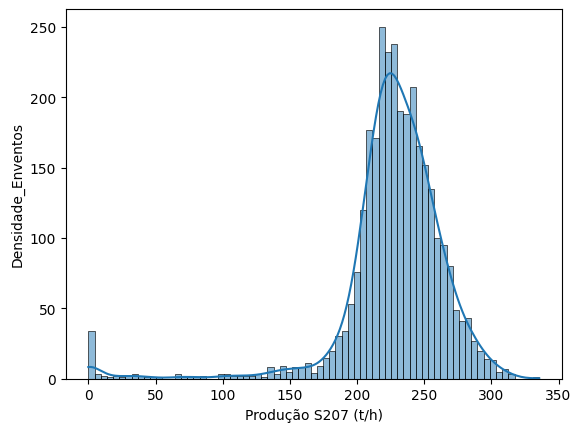

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(merged_df['PRODUCT WEIGHT S207 (t/h)'], kde=True)
plt.xlabel('Produção S207 (t/h)')
plt.ylabel('Densidade_Enventos')

Tecnicamente valores de produção abaixo de 150t/h são falhas de equipamentos, que não estão sendo foco deste estudo.


# Definindo as classes de variáveis a serem utilizadas
O objetivo desta organização é em um segundo momento realizar os treinamentos e testes com diferentes variáveis sedo objetivadas.

In [269]:
# Excluir as linhas em que 'PRODUCT WEIGHT S207 (t/h)' seja menor que 150
merged_df = merged_df.drop(merged_df[merged_df['PRODUCT WEIGHT S207 (t/h)'] < 150].index)

In [270]:
# Variáveis de Processo
V_processo = [
    'PRODUCT WEIGHT S207 (t/h)','  BED DEPTH CONTROL SETPOINT (mm)',
    ' Posição calculada da queima atual (m)','Speed-Nine','Pyrometer AC17(Deg C)',
    'Pyrometer TCM203(Deg C)'
]

In [271]:
# Variáveis da Mistura
V_mistura =['101 FEEDER MOISTRUE SETPOINT(%)','102 FEEDER MOISTRUE SETPOINT(%)','103 FEEDER MOISTRUE SETPOINT(%)','104 FEEDER MOISTRUE SETPOINT(%)',
            '105 FEEDER MOISTRUE SETPOINT(%)','106 FEEDER MOISTRUE SETPOINT(%)','107 FEEDER MOISTRUE SETPOINT(%)','108 FEEDER MOISTRUE SETPOINT(%)',
            '109 FEEDER MOISTRUE SETPOINT(%)','110 FEEDER MOISTRUE SETPOINT(%)','115 FEEDER MOISTRUE SETPOINT(%)','116 FEEDER MOISTRUE SETPOINT(%)']


In [272]:
# Taxa de adição de água
Tx_agua = ['Tx_primario', 'Tx_secundario', 'Tx_agua_total']

In [273]:
# Variáveis Químicas
V_quimica = ['FeT MHVB','CaO MHVB','SiO2 MHVB','Al2O3 MHVB','MgO MHVB','MnT MHVB','P MHVB','TiO2 MHVB','FeO MHVB','PPC MHVB','CF MHVB']

In [274]:
# Variáveis Granulométricas (% retido em cada malha)
V_gran = ['8,00 MHVB','6,30 MHVB','4,75 MHVB','2,80 MHVB','2,00 MHVB','1,00 MHVB','0,500 MHVB','0,250 MHVB',
          '0,150 MHVB','0,125 MHVB','0,106 MHVB','0,063 MHVB','0,045 MHVB','FUNDO MHVB']

In [275]:
# Faixas granulométricas
Faixas =  ['>2,80 MHVB', '>1,00 MHVB', '>0,25 MHVB', '<0,125 MHVB', '<0,045 MHVB', '>6,3 MHVB', '<0,150 MHVB']

In [276]:
# Classes de MP
classe_MP = ['LXIN', 'MCJM', 'MCLGA AC', 'MFBU1', 'MFLGA VL', 'MFMTP', 'MFVL', 'MFVA', 'MCLGA VLN', 'MFIB', 'MFSMB', 'MFBU 2', 'MFLGAVLN', 'MFVO',
             'MFSAFM', 'MFGG', 'MPBU', 'MPBU2', 'MCLGA HT', 'MFBE', 'MFPV', 'MCLGA MC VL', 'MFLGA HT', 'MCSAFM', 'MPSS', 'MFBE T2', 'MFVL SEMIL','MCAVG']

In [277]:
# definindo as bases de dados
#Base1 {Variáveis de Processo,Variáveis da Mistura,As taxas de adição de água,Variáveis Químicas,Variáveis Granulométricas}
df_base1 = merged_df[V_processo + V_mistura + Tx_agua + V_quimica + V_gran]
#Base2 {Variáveis de Processo,Variáveis da Mistura,As taxas de adição de água,Variáveis Químicas,Faixas granulométricas}
df_base2 = merged_df[V_processo + V_mistura + Tx_agua + V_quimica + Faixas]
#Base3 {Variáveis de Processo,Variáveis da Mistura,As taxas de adição de água,Classe das MP,Variáveis Granulométricas}
df_base3 = merged_df[V_processo + V_mistura + Tx_agua + classe_MP + V_gran]
#Base4 {Variáveis de Processo,Variáveis da Mistura,As taxas de adição de água,Classe das MP,Faixas granulométricas}
df_base4 = merged_df[V_processo + V_mistura + Tx_agua + classe_MP + Faixas]



In [278]:
df_base1.describe()

,PRODUCT WEIGHT S207 (t/h),BED DEPTH CONTROL SETPOINT (mm),Posição calculada da queima atual (m),Speed-Nine,Pyrometer AC17(Deg C),Pyrometer TCM203(Deg C),101 FEEDER MOISTRUE SETPOINT(%),102 FEEDER MOISTRUE SETPOINT(%),103 FEEDER MOISTRUE SETPOINT(%),104 FEEDER MOISTRUE SETPOINT(%),...,"2,00 MHVB","1,00 MHVB","0,500 MHVB","0,250 MHVB","0,150 MHVB","0,125 MHVB","0,106 MHVB","0,063 MHVB","0,045 MHVB",FUNDO MHVB
count,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,...,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000
mean,232.957522,593.036242,31.099963,0.357650,32.807345,38.433233,7.448200,2.086454,9.317246,9.216683,...,5.979135,8.992400,6.065064,6.493082,8.251481,2.765494,3.248382,12.729051,9.348037,11.250862
std,25.856743,14.789394,2.353610,0.069292,2.882516,2.934014,3.819214,3.551587,1.367670,1.595911,...,0.693828,0.919080,1.329593,1.590036,2.631582,0.701233,0.737907,2.337012,1.561396,3.291818
min,150.480000,560.000000,28.500000,0.166160,18.524892,23.104767,0.000000,0.000000,0.000000,0.000000,...,4.574212,7.451923,4.520722,4.001701,4.772539,1.940163,1.985129,8.189889,5.620257,5.811947
25%,216.272500,580.000000,29.112500,0.332792,30.902635,36.561779,7.260000,0.000000,8.282125,8.220000,...,5.530597,8.233037,5.357394,4.746914,6.125179,2.292178,2.732631,10.987694,8.396774,8.348564
50%,230.980000,600.000000,30.585000,0.333333,32.653013,38.634942,8.640000,0.000000,9.300000,9.250000,...,5.848334,8.673535,5.667360,6.513261,7.249540,2.574960,3.174845,12.621890,9.460044,10.863828
75%,249.432500,600.000000,32.570000,0.334413,34.807400,40.564542,9.900000,6.710000,10.207500,10.200000,...,6.572202,9.989669,6.168692,8.332353,10.922831,3.130701,3.768625,14.082136,10.017357,14.033411
max,335.660000,630.000000,55.280000,0.540636,40.853042,48.126983,14.910000,9.160000,14.910000,14.910000,...,7.446687,10.939207,10.211867,9.493485,14.246751,4.688936,5.098529,19.727822,12.523541,18.742579


In [279]:
df_base2

,PRODUCT WEIGHT S207 (t/h),BED DEPTH CONTROL SETPOINT (mm),Posição calculada da queima atual (m),Speed-Nine,Pyrometer AC17(Deg C),Pyrometer TCM203(Deg C),101 FEEDER MOISTRUE SETPOINT(%),102 FEEDER MOISTRUE SETPOINT(%),103 FEEDER MOISTRUE SETPOINT(%),104 FEEDER MOISTRUE SETPOINT(%),...,FeO MHVB,PPC MHVB,CF MHVB,">2,80 MHVB",">1,00 MHVB",">0,25 MHVB","<0,125 MHVB","<0,045 MHVB",">6,3 MHVB","<0,150 MHVB"
96,220.47,600.0,31.51,0.332703,35.005283,39.942850,10.000,0.0,10.000,10.000,...,1.296526,2.092306,0.0,25.784306,42.977124,56.187817,33.92866,11.562883,8.922245,36.903148
97,229.82,600.0,32.00,0.333955,34.704767,39.968242,9.303,0.0,9.303,9.303,...,1.296526,2.092306,0.0,25.784306,42.977124,56.187817,33.92866,11.562883,8.922245,36.903148
98,225.28,600.0,33.53,0.333962,34.681492,39.293125,9.180,0.0,9.180,9.180,...,1.296526,2.092306,0.0,25.784306,42.977124,56.187817,33.92866,11.562883,8.922245,36.903148
99,244.68,600.0,33.63,0.333333,34.321692,38.929108,9.180,0.0,9.180,9.180,...,1.296526,2.092306,0.0,25.784306,42.977124,56.187817,33.92866,11.562883,8.922245,36.903148
100,217.47,600.0,30.35,0.333333,35.991767,40.247892,9.180,0.0,9.180,9.180,...,1.296526,2.092306,0.0,25.784306,42.977124,56.187817,33.92866,11.562883,8.922245,36.903148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,250.19,600.0,33.28,0.333333,32.344983,40.630692,6.680,0.0,6.680,6.680,...,2.372100,1.466898,0.0,23.532239,36.529633,48.593704,35.60818,7.748836,9.706498,39.984928
4339,240.64,600.0,36.84,0.332784,30.721867,38.461333,6.680,0.0,6.680,6.680,...,2.372100,1.466898,0.0,23.532239,36.529633,48.593704,35.60818,7.748836,9.706498,39.984928
4340,223.77,600.0,32.55,0.333333,30.789408,37.665600,6.680,0.0,6.680,6.680,...,2.372100,1.466898,0.0,23.532239,36.529633,48.593704,35.60818,7.748836,9.706498,39.984928
4342,249.73,600.0,31.44,0.329331,28.105817,35.437042,7.250,0.0,7.117,7.117,...,2.372100,1.466898,0.0,23.532239,36.529633,48.593704,35.60818,7.748836,9.706498,39.984928


In [280]:
df_base3

,PRODUCT WEIGHT S207 (t/h),BED DEPTH CONTROL SETPOINT (mm),Posição calculada da queima atual (m),Speed-Nine,Pyrometer AC17(Deg C),Pyrometer TCM203(Deg C),101 FEEDER MOISTRUE SETPOINT(%),102 FEEDER MOISTRUE SETPOINT(%),103 FEEDER MOISTRUE SETPOINT(%),104 FEEDER MOISTRUE SETPOINT(%),...,"2,00 MHVB","1,00 MHVB","0,500 MHVB","0,250 MHVB","0,150 MHVB","0,125 MHVB","0,106 MHVB","0,063 MHVB","0,045 MHVB",FUNDO MHVB
96,220.47,600.0,31.51,0.332703,35.005283,39.942850,10.000,0.0,10.000,10.000,...,6.767089,10.425729,7.079123,6.131570,6.909035,2.974488,3.102774,9.582147,9.680855,11.562883
97,229.82,600.0,32.00,0.333955,34.704767,39.968242,9.303,0.0,9.303,9.303,...,6.767089,10.425729,7.079123,6.131570,6.909035,2.974488,3.102774,9.582147,9.680855,11.562883
98,225.28,600.0,33.53,0.333962,34.681492,39.293125,9.180,0.0,9.180,9.180,...,6.767089,10.425729,7.079123,6.131570,6.909035,2.974488,3.102774,9.582147,9.680855,11.562883
99,244.68,600.0,33.63,0.333333,34.321692,38.929108,9.180,0.0,9.180,9.180,...,6.767089,10.425729,7.079123,6.131570,6.909035,2.974488,3.102774,9.582147,9.680855,11.562883
100,217.47,600.0,30.35,0.333333,35.991767,40.247892,9.180,0.0,9.180,9.180,...,6.767089,10.425729,7.079123,6.131570,6.909035,2.974488,3.102774,9.582147,9.680855,11.562883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,250.19,600.0,33.28,0.333333,32.344983,40.630692,6.680,0.0,6.680,6.680,...,5.071772,7.925621,5.550811,6.513261,11.421574,4.376748,5.042801,14.136197,8.680346,7.748836
4339,240.64,600.0,36.84,0.332784,30.721867,38.461333,6.680,0.0,6.680,6.680,...,5.071772,7.925621,5.550811,6.513261,11.421574,4.376748,5.042801,14.136197,8.680346,7.748836
4340,223.77,600.0,32.55,0.333333,30.789408,37.665600,6.680,0.0,6.680,6.680,...,5.071772,7.925621,5.550811,6.513261,11.421574,4.376748,5.042801,14.136197,8.680346,7.748836
4342,249.73,600.0,31.44,0.329331,28.105817,35.437042,7.250,0.0,7.117,7.117,...,5.071772,7.925621,5.550811,6.513261,11.421574,4.376748,5.042801,14.136197,8.680346,7.748836


In [281]:
df_base4

,PRODUCT WEIGHT S207 (t/h),BED DEPTH CONTROL SETPOINT (mm),Posição calculada da queima atual (m),Speed-Nine,Pyrometer AC17(Deg C),Pyrometer TCM203(Deg C),101 FEEDER MOISTRUE SETPOINT(%),102 FEEDER MOISTRUE SETPOINT(%),103 FEEDER MOISTRUE SETPOINT(%),104 FEEDER MOISTRUE SETPOINT(%),...,MFBE T2,MFVL SEMIL,MCAVG,">2,80 MHVB",">1,00 MHVB",">0,25 MHVB","<0,125 MHVB","<0,045 MHVB",">6,3 MHVB","<0,150 MHVB"
96,220.47,600.0,31.51,0.332703,35.005283,39.942850,10.000,0.0,10.000,10.000,...,0.0,0.0,0.000000,25.784306,42.977124,56.187817,33.92866,11.562883,8.922245,36.903148
97,229.82,600.0,32.00,0.333955,34.704767,39.968242,9.303,0.0,9.303,9.303,...,0.0,0.0,0.000000,25.784306,42.977124,56.187817,33.92866,11.562883,8.922245,36.903148
98,225.28,600.0,33.53,0.333962,34.681492,39.293125,9.180,0.0,9.180,9.180,...,0.0,0.0,0.000000,25.784306,42.977124,56.187817,33.92866,11.562883,8.922245,36.903148
99,244.68,600.0,33.63,0.333333,34.321692,38.929108,9.180,0.0,9.180,9.180,...,0.0,0.0,0.000000,25.784306,42.977124,56.187817,33.92866,11.562883,8.922245,36.903148
100,217.47,600.0,30.35,0.333333,35.991767,40.247892,9.180,0.0,9.180,9.180,...,0.0,0.0,0.000000,25.784306,42.977124,56.187817,33.92866,11.562883,8.922245,36.903148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,250.19,600.0,33.28,0.333333,32.344983,40.630692,6.680,0.0,6.680,6.680,...,0.0,0.0,0.021032,23.532239,36.529633,48.593704,35.60818,7.748836,9.706498,39.984928
4339,240.64,600.0,36.84,0.332784,30.721867,38.461333,6.680,0.0,6.680,6.680,...,0.0,0.0,0.021032,23.532239,36.529633,48.593704,35.60818,7.748836,9.706498,39.984928
4340,223.77,600.0,32.55,0.333333,30.789408,37.665600,6.680,0.0,6.680,6.680,...,0.0,0.0,0.021032,23.532239,36.529633,48.593704,35.60818,7.748836,9.706498,39.984928
4342,249.73,600.0,31.44,0.329331,28.105817,35.437042,7.250,0.0,7.117,7.117,...,0.0,0.0,0.021032,23.532239,36.529633,48.593704,35.60818,7.748836,9.706498,39.984928


# Dividindo as bases de dados em conjunto de treinamento e teste

In [282]:
from sklearn.model_selection import train_test_split


# Dividindo df_base(1,2,3 e 4) em conjunto de treinamento e teste
# Primeiro dividiremos as bases em treino e teste para somente após reallizar a normalização e a discretização dos dados.

X_train_base1, X_test_base1, y_train_base1, y_test_base1 = train_test_split(
    df_base1.drop(columns=['PRODUCT WEIGHT S207 (t/h)']),
    df_base1['PRODUCT WEIGHT S207 (t/h)'],
    test_size=0.2, random_state=42
)

X_train_base2, X_test_base2, y_train_base2, y_test_base2 = train_test_split(
    df_base2.drop(columns=['PRODUCT WEIGHT S207 (t/h)']),
    df_base2['PRODUCT WEIGHT S207 (t/h)'],
    test_size=0.2, random_state=42
)

X_train_base3, X_test_base3, y_train_base3, y_test_base3 = train_test_split(
    df_base3.drop(columns=['PRODUCT WEIGHT S207 (t/h)']),
    df_base3['PRODUCT WEIGHT S207 (t/h)'],
    test_size=0.2, random_state=42
)

X_train_base4, X_test_base4, y_train_base4, y_test_base4 = train_test_split(
    df_base4.drop(columns=['PRODUCT WEIGHT S207 (t/h)']),
    df_base4['PRODUCT WEIGHT S207 (t/h)'],
    test_size=0.2, random_state=42
)


In [283]:

# Verificar valores máximos em X_train_base1 e X_test_base1
print(X_train_base1.max())
print(X_test_base1.max())

  BED DEPTH CONTROL SETPOINT (mm)         630.000000
 Posição calculada da queima atual (m)     55.280000
Speed-Nine                                  0.540636
Pyrometer AC17(Deg C)                      40.853042
Pyrometer TCM203(Deg C)                    48.126983
101 FEEDER MOISTRUE SETPOINT(%)            14.910000
102 FEEDER MOISTRUE SETPOINT(%)             9.160000
103 FEEDER MOISTRUE SETPOINT(%)            14.910000
104 FEEDER MOISTRUE SETPOINT(%)            14.910000
105 FEEDER MOISTRUE SETPOINT(%)            14.910000
106 FEEDER MOISTRUE SETPOINT(%)             9.740000
107 FEEDER MOISTRUE SETPOINT(%)             9.200000
108 FEEDER MOISTRUE SETPOINT(%)            20.000000
109 FEEDER MOISTRUE SETPOINT(%)             6.600000
110 FEEDER MOISTRUE SETPOINT(%)             6.600000
115 FEEDER MOISTRUE SETPOINT(%)            25.900000
116 FEEDER MOISTRUE SETPOINT(%)            23.310000
Tx_primario                                 0.041490
Tx_secundario                               0.

In [284]:
# Estava ocorrendo um erro pois na divisão para o calculo das taxas eu não havia retirado os valores de zero do divisor.
X_train_base1[Tx_agua].describe()

,Tx_primario,Tx_secundario,Tx_agua_total
count,2395.000000,2395.000000,2395.000000
mean,0.022860,0.008338,0.031198
std,0.011547,0.004278,0.013516
min,0.000000,-0.000464,-0.000458
25%,0.009659,0.006263,0.020581
50%,0.026772,0.008895,0.033821
75%,0.032451,0.010753,0.041983
max,0.041490,0.026123,0.057042


In [285]:
# Normalizando os dados de treinamento e teste para cada base de dados

from sklearn.preprocessing import MinMaxScaler

# Criando uma instância do MinMaxScaler
scaler = MinMaxScaler()

# Base 1
X_train_base1_norm = scaler.fit_transform(X_train_base1)
X_test_base1_norm = scaler.transform(X_test_base1)

# Base 2
X_train_base2_norm = scaler.fit_transform(X_train_base2)
X_test_base2_norm = scaler.transform(X_test_base2)

# Base 3
X_train_base3_norm = scaler.fit_transform(X_train_base3)
X_test_base3_norm = scaler.transform(X_test_base3)

# Base 4
X_train_base4_norm = scaler.fit_transform(X_train_base4)
X_test_base4_norm = scaler.transform(X_test_base4)




In [286]:
# Verificar valores máximos em X_train_base1 e X_test_base1
print(X_train_base1_norm.max())
print(X_test_base1_norm.max())

1.0000000000000004
1.0000000000000004


O fato de você obter o valor 1.0000000000000004 e 1.0000000000000004 para X_train_base1_norm.max() e X_test_base1_norm.max() respectivamente pode estar relacionado com a precisão de ponto flutuante em Python.

In [287]:
# Verificar valores máximos em X_train_base2 e X_test_base2
print(X_train_base2_norm.max())
print(X_test_base2_norm.max())

1.0000000000000002
1.0000000000000002


In [288]:
# Verificar valores máximos em X_train_base3 e X_test_base3
print(X_train_base3_norm.max())
print(X_test_base3_norm.max())

1.0000000000000004
1.0000000000000004


In [289]:
# Verificar valores máximos em X_train_base4 e X_test_base4
print(X_train_base4_norm.max())
print(X_test_base4_norm.max())

1.0000000000000002
1.0000000000000002


In [290]:
# Convertendo os valores contínuos em rótulos discretos com base nas faixas

import numpy as np
# Definindo as faixas para cada base de dados
faixas = [160, 200, 240, 280, 320]

def discretizar_faixas(y, faixas):
    return np.digitize(y, faixas)

# Definindo os rótulos para cada base de dados
y_train_base1_discrete = discretizar_faixas(y_train_base1, faixas)
y_test_base1_discrete = discretizar_faixas(y_test_base1, faixas)

y_train_base2_discrete = discretizar_faixas(y_train_base2, faixas)
y_test_base2_discrete = discretizar_faixas(y_test_base2, faixas)

y_train_base3_discrete = discretizar_faixas(y_train_base3, faixas)
y_test_base3_discrete = discretizar_faixas(y_test_base3, faixas)

y_train_base4_discrete = discretizar_faixas(y_train_base4, faixas)
y_test_base4_discrete = discretizar_faixas(y_test_base4, faixas)



In [291]:
y_train_base1_discrete

array([2, 3, 2, ..., 2, 2, 2])

In [292]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

# classificador KNN para a base 1

# Criando o classificador KNN
knn = KNeighborsClassifier(n_neighbors=10)

# Definindo o número de folds
num_folds = 10

# Criando uma instância do K-Fold para a Base 1
kf_base1 = KFold(n_splits=num_folds)

# Iniciando listas para armazenar os resultados de cada fold para a Base 1
acc_scores_base1 = []

# Loop para executar o K-Fold Cross Validation para a Base 1
for train_index, test_index in kf_base1.split(X_train_base1_norm):
    # Separando os conjuntos de treinamento e teste para este fold
    X_train_fold, X_test_fold = X_train_base1_norm[train_index], X_train_base1_norm[test_index]
    y_train_fold, y_test_fold = y_train_base1_discrete[train_index], y_train_base1_discrete[test_index]

    # Treinando o modelo KNN para este fold
    knn.fit(X_train_fold, y_train_fold)

    # Avaliando o modelo no conjunto de teste deste fold
    acc_score = knn.score(X_test_fold, y_test_fold)

    # Armazenando o resultado deste fold para a Base 1
    acc_scores_base1.append(acc_score)

# Calculando a média e o desvio padrão das acurácias obtidas em cada fold para a Base 1
mean_acc_base1 = np.mean(acc_scores_base1)
std_acc_base1 = np.std(acc_scores_base1)

print("Acurácias em cada fold para a Base 1:", acc_scores_base1)
print("Acurácia média para a Base 1:", mean_acc_base1)
print("Desvio padrão da acurácia para a Base 1:", std_acc_base1)


Acurácias em cada fold para a Base 1: [0.6583333333333333, 0.725, 0.65, 0.6625, 0.6916666666666667, 0.7447698744769874, 0.7280334728033473, 0.702928870292887, 0.7071129707112971, 0.7071129707112971]
Acurácia média para a Base 1: 0.6977458158995814
Desvio padrão da acurácia para a Base 1: 0.03030837564097271


In [293]:
# classificador KNN para a base 2

# Criando o classificador KNN
knn = KNeighborsClassifier(n_neighbors=10)

# Definindo o número de folds
num_folds = 10

# Criando uma instância do K-Fold para a Base 2
kf_base2 = KFold(n_splits=num_folds)

# Iniciando listas para armazenar os resultados de cada fold para a Base 2
acc_scores_base2 = []

# Loop para executar o K-Fold Cross Validation para a Base 2
for train_index, test_index in kf_base2.split(X_train_base2_norm):
    # Separando os conjuntos de treinamento e teste para este fold
    X_train_fold, X_test_fold = X_train_base2_norm[train_index], X_train_base2_norm[test_index]
    y_train_fold, y_test_fold = y_train_base2_discrete[train_index], y_train_base2_discrete[test_index]

    # Treinando o modelo KNN para este fold
    knn.fit(X_train_fold, y_train_fold)

    # Avaliando o modelo no conjunto de teste deste fold
    acc_score = knn.score(X_test_fold, y_test_fold)

    # Armazenando o resultado deste fold para a Base 2
    acc_scores_base2.append(acc_score)

# Calculando a média e o desvio padrão das acurácias obtidas em cada fold para a Base 2
mean_acc_base2 = np.mean(acc_scores_base2)
std_acc_base2 = np.std(acc_scores_base2)

print("Acurácias em cada fold para a Base 2:", acc_scores_base2)
print("Acurácia média para a Base 2:", mean_acc_base2)
print("Desvio padrão da acurácia para a Base 2:", std_acc_base2)


Acurácias em cada fold para a Base 2: [0.6583333333333333, 0.725, 0.65, 0.6625, 0.6916666666666667, 0.7447698744769874, 0.7280334728033473, 0.702928870292887, 0.7071129707112971, 0.7071129707112971]
Acurácia média para a Base 2: 0.6977458158995814
Desvio padrão da acurácia para a Base 2: 0.03030837564097271


In [294]:

# Rodando todas as bases simultaneas


# classificador KNN para a base (1,2,3 e 4)

# Criando o classificador KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Definindo o número de folds
num_folds = 2

# Criando uma lista para armazenar os resultados de cada base
resultados_bases = []

# Loop para iterar sobre as quatro bases
for base_num in range(1, 5):
    # Criando uma instância do K-Fold para a Base X
    kf_baseX = KFold(n_splits=num_folds)

    # Iniciando lista para armazenar os resultados de cada fold para a Base X
    acc_scores_baseX = []

    # Separando os dados normalizados e rótulos discretos para a Base X
    X_train = globals()["X_train_base{}_norm".format(base_num)]
    X_test = globals()["X_test_base{}_norm".format(base_num)]
    y_train = globals()["y_train_base{}_discrete".format(base_num)]
    y_test = globals()["y_test_base{}_discrete".format(base_num)]

    # Loop para executar o K-Fold Cross Validation para a Base X
    for train_index, test_index in kf_baseX.split(X_train):
        # Separando os conjuntos de treinamento e teste para este fold
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

        # Treinando o modelo KNN para este fold
        knn.fit(X_train_fold, y_train_fold)

        # Avaliando o modelo no conjunto de teste deste fold
        acc_score = knn.score(X_test_fold, y_test_fold)

        # Armazenando o resultado deste fold para a Base X
        acc_scores_baseX.append(acc_score)

    # Calculando a média e o desvio padrão das acurácias obtidas em cada fold para a Base X
    mean_acc_baseX = np.mean(acc_scores_baseX)
    std_acc_baseX = np.std(acc_scores_baseX)

    # Armazenando os resultados da Base X na lista de resultados das bases
    resultados_bases.append((mean_acc_baseX, std_acc_baseX))

    print(f"Resultados para a Base {base_num}:")
    print("Acurácias em cada fold:", acc_scores_baseX)
    print("Acurácia média:", mean_acc_baseX)
    print("Desvio padrão da acurácia:", std_acc_baseX)
    print("\n")

# Resultados finais para todas as bases
print("Resultados finais:")
for base_num, (mean_acc, std_acc) in enumerate(resultados_bases, start=1):
    print(f"Acurácia média para a Base {base_num}: {mean_acc}")
    print(f"Desvio padrão da acurácia para a Base {base_num}: {std_acc}")
    print("\n")


Resultados para a Base 1:
Acurácias em cada fold: [0.6410684474123539, 0.6666666666666666]
Acurácia média: 0.6538675570395103
Desvio padrão da acurácia: 0.012799109627156358


Resultados para a Base 2:
Acurácias em cada fold: [0.6410684474123539, 0.6666666666666666]
Acurácia média: 0.6538675570395103
Desvio padrão da acurácia: 0.012799109627156358


Resultados para a Base 3:
Acurácias em cada fold: [0.6427378964941569, 0.6666666666666666]
Acurácia média: 0.6547022815804118
Desvio padrão da acurácia: 0.011964385086254858


Resultados para a Base 4:
Acurácias em cada fold: [0.6427378964941569, 0.6666666666666666]
Acurácia média: 0.6547022815804118
Desvio padrão da acurácia: 0.011964385086254858


Resultados finais:
Acurácia média para a Base 1: 0.6538675570395103
Desvio padrão da acurácia para a Base 1: 0.012799109627156358


Acurácia média para a Base 2: 0.6538675570395103
Desvio padrão da acurácia para a Base 2: 0.012799109627156358


Acurácia média para a Base 3: 0.6547022815804118
De

In [295]:
# Criando o classificador Naive Bayes

from sklearn.naive_bayes import GaussianNB


# Criando instância
nb = GaussianNB()

# Definindo o número de folds
num_folds = 3

# Criando uma lista para armazenar os resultados de cada base
resultados_bases = []

# Loop para iterar sobre as quatro bases
for base_num in range(1, 5):
    # Criando uma instância do K-Fold para a Base X
    kf_baseX = KFold(n_splits=num_folds)

    # Iniciando lista para armazenar os resultados de cada fold para a Base X
    acc_scores_baseX = []

    # Separando os dados normalizados e rótulos discretos para a Base X
    X_train = globals()["X_train_base{}_norm".format(base_num)]
    X_test = globals()["X_test_base{}_norm".format(base_num)]
    y_train = globals()["y_train_base{}_discrete".format(base_num)]
    y_test = globals()["y_test_base{}_discrete".format(base_num)]

    # Loop para executar o K-Fold Cross Validation para a Base X
    for train_index, test_index in kf_baseX.split(X_train):
        # Separando os conjuntos de treinamento e teste para este fold
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

        # Treinando o modelo Naive Bayes para este fold
        nb.fit(X_train_fold, y_train_fold)

        # Avaliando o modelo no conjunto de teste deste fold
        acc_score = nb.score(X_test_fold, y_test_fold)

        # Armazenando o resultado deste fold para a Base X
        acc_scores_baseX.append(acc_score)

    # Calculando a média e o desvio padrão das acurácias obtidas em cada fold para a Base X
    mean_acc_baseX = np.mean(acc_scores_baseX)
    std_acc_baseX = np.std(acc_scores_baseX)

    # Armazenando os resultados da Base X na lista de resultados das bases
    resultados_bases.append((mean_acc_baseX, std_acc_baseX))

    print(f"Resultados para a Base {base_num}:")
    print("Acurácias em cada fold:", acc_scores_baseX)
    print("Acurácia média:", mean_acc_baseX)
    print("Desvio padrão da acurácia:", std_acc_baseX)
    print("\n")

# Resultados finais para todas as bases
print("Resultados finais:")
for base_num, (mean_acc, std_acc) in enumerate(resultados_bases, start=1):
    print(f"Acurácia média para a Base {base_num}: {mean_acc}")
    print(f"Desvio padrão da acurácia para a Base {base_num}: {std_acc}")
    print("\n")


Resultados para a Base 1:
Acurácias em cada fold: [0.42052565707133915, 0.5012531328320802, 0.38596491228070173]
Acurácia média: 0.43591456739470696
Desvio padrão da acurácia: 0.04830774520496214


Resultados para a Base 2:
Acurácias em cada fold: [0.4192740926157697, 0.4899749373433584, 0.3483709273182957]
Acurácia média: 0.41920665242580796
Desvio padrão da acurácia: 0.05780961468434658


Resultados para a Base 3:
Acurácias em cada fold: [0.2715894868585732, 0.2756892230576441, 0.20300751879699247]
Acurácia média: 0.2500954095710699
Desvio padrão da acurácia: 0.03333820683429229


Resultados para a Base 4:
Acurácias em cada fold: [0.27033792240300375, 0.2731829573934837, 0.20050125313283207]
Acurácia média: 0.2480073776431065
Desvio padrão da acurácia: 0.03361197659082783


Resultados finais:
Acurácia média para a Base 1: 0.43591456739470696
Desvio padrão da acurácia para a Base 1: 0.04830774520496214


Acurácia média para a Base 2: 0.41920665242580796
Desvio padrão da acurácia para 

Como o Naive Bayes possui um principio de funcionamento diferente do KNN enquanto o KNN tem seu algorítimo baseado na distância o Naive Bayes é um algorítimo probabilistico.

In [296]:
# Criando o classificador Naive Bayes (Não normalizados, porem discretizada)

#Testando dados não normalizados no dados de treinamento

# Criando instância
nb = GaussianNB()

# Definindo o número de folds
num_folds = 3

# Criando uma lista para armazenar os resultados de cada base
resultados_bases = []

# Loop para iterar sobre as quatro bases
for base_num in range(1, 5):
    # Criando uma instância do K-Fold para a Base X
    kf_baseX = KFold(n_splits=num_folds)

    # Iniciando lista para armazenar os resultados de cada fold para a Base X
    acc_scores_baseX = []

    # Separando os dados não normalizados e rótulos discretos para a Base X
    X_train = globals()["X_train_base{}".format(base_num)]
    X_test = globals()["X_test_base{}".format(base_num)]
    y_train = globals()["y_train_base{}_discrete".format(base_num)]
    y_test = globals()["y_test_base{}_discrete".format(base_num)]


    # Convertendo os dados para arrays numpy
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    # Loop para executar o K-Fold Cross Validation para a Base X
    for train_index, test_index in kf_baseX.split(X_train):
        # Separando os conjuntos de treinamento e teste para este fold
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

        # Treinando o modelo Naive Bayes para este fold
        nb.fit(X_train_fold, y_train_fold)

        # Avaliando o modelo no conjunto de teste deste fold
        acc_score = nb.score(X_test_fold, y_test_fold)

        # Armazenando o resultado deste fold para a Base X
        acc_scores_baseX.append(acc_score)

    # Calculando a média e o desvio padrão das acurácias obtidas em cada fold para a Base X
    mean_acc_baseX = np.mean(acc_scores_baseX)
    std_acc_baseX = np.std(acc_scores_baseX)

    # Armazenando os resultados da Base X na lista de resultados das bases
    resultados_bases.append((mean_acc_baseX, std_acc_baseX))

    print(f"Resultados para a Base {base_num}:")
    print("Acurácias em cada fold:", acc_scores_baseX)
    print("Acurácia média:", mean_acc_baseX)
    print("Desvio padrão da acurácia:", std_acc_baseX)
    print("\n")

# Resultados finais para todas as bases
print("Resultados finais:")
for base_num, (mean_acc, std_acc) in enumerate(resultados_bases, start=1):
    print(f"Acurácia média para a Base {base_num}: {mean_acc}")
    print(f"Desvio padrão da acurácia para a Base {base_num}: {std_acc}")
    print("\n")


Resultados para a Base 1:
Acurácias em cada fold: [0.42052565707133915, 0.5012531328320802, 0.44862155388471175]
Acurácia média: 0.4568001145960437
Desvio padrão da acurácia: 0.03346040423303305


Resultados para a Base 2:
Acurácias em cada fold: [0.4192740926157697, 0.4899749373433584, 0.44360902255639095]
Acurácia média: 0.45095268417183965
Desvio padrão da acurácia: 0.02932688625067804


Resultados para a Base 3:
Acurácias em cada fold: [0.3166458072590738, 0.3132832080200501, 0.30701754385964913]
Acurácia média: 0.31231551971292437
Desvio padrão da acurácia: 0.003989835378139987


Resultados para a Base 4:
Acurácias em cada fold: [0.28911138923654567, 0.2957393483709273, 0.2706766917293233]
Acurácia média: 0.2851758097789321
Desvio padrão da acurácia: 0.010603483035749052


Resultados finais:
Acurácia média para a Base 1: 0.4568001145960437
Desvio padrão da acurácia para a Base 1: 0.03346040423303305


Acurácia média para a Base 2: 0.45095268417183965
Desvio padrão da acurácia para

In [297]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split


# Criando regressor DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()

# Definindo o número de folds desejados (por exemplo, k=10 para 10-Fold)
num_folds = 10

# Criando uma lista para armazenar os resultados de cada base
resultados_bases = []

# Loop para iterar sobre as quatro bases
for base_num in range(1, 5):
    # Criando uma instância do K-Fold para a Base X
    kf_baseX = KFold(n_splits=num_folds)

    # Iniciando lista para armazenar os resultados de cada fold para a Base X
    scores_baseX = []

    # Separando os dados para treinamento e teste após a divisão inicial
    X_train = globals()["X_train_base{}".format(base_num)]
    X_test = globals()["X_test_base{}".format(base_num)]
    y_train = globals()["y_train_base{}".format(base_num)]
    y_test = globals()["y_test_base{}".format(base_num)]

    # Convertendo os dados para arrays numpy
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    # Loop para executar o K-Fold Cross Validation para a Base X
    for train_index, test_index in kf_baseX.split(X_train):
        # Separando os conjuntos de treinamento e teste para este fold
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

        # Treinando o modelo DecisionTreeRegressor para este fold
        dt_regressor.fit(X_train_fold, y_train_fold)

        # Avaliando o modelo no conjunto de teste deste fold
        score = dt_regressor.score(X_test_fold, y_test_fold)

        # Armazenando o resultado deste fold para a Base X
        scores_baseX.append(score)

    # Calculando a média e o desvio padrão dos scores obtidos em cada fold para a Base X
    mean_score_baseX = np.mean(scores_baseX)
    std_score_baseX = np.std(scores_baseX)

    # Armazenando os resultados da Base X na lista de resultados das bases
    resultados_bases.append((mean_score_baseX, std_score_baseX))

    print(f"Resultados para a Base {base_num}:")
    print("Scores em cada fold:", scores_baseX)
    print("Score médio:", mean_score_baseX)
    print("Desvio padrão do score:", std_score_baseX)
    print("\n")

# Resultados finais para todas as bases
print("Resultados finais:")
for base_num, (mean_score, std_score) in enumerate(resultados_bases, start=1):
    print(f"Score médio para a Base {base_num}: {mean_score}")
    print(f"Desvio padrão do score para a Base {base_num}: {std_score}")
    print("\n")




Resultados para a Base 1:
Scores em cada fold: [0.37888756154736436, 0.30807449875311577, 0.2911550908860314, 0.12586267831530007, 0.3260250202528785, 0.18103585044589854, 0.2568450601067792, 0.1516042367355932, 0.2580903350539794, 0.2714638724200944]
Score médio: 0.2549044204517035
Desvio padrão do score: 0.07592003932641367


Resultados para a Base 2:
Scores em cada fold: [-0.018593196357679975, 0.2330015967151724, 0.3314876991378247, 0.12968417799951848, 0.24182747854605258, 0.21610873304197886, 0.16969363436921314, 0.21081469052949553, 0.3912087935550018, 0.159434029686351]
Score médio: 0.20646676372229286
Desvio padrão do score: 0.10580080039789969


Resultados para a Base 3:
Scores em cada fold: [0.07375417737335643, 0.3761099898873633, 0.4043165235652657, 0.2576118416535411, 0.275679613834507, 0.3342743800346073, 0.24276284306924678, 0.19958574733293777, 0.35700915099955877, 0.07762778861802]
Score médio: 0.2598732056368404
Desvio padrão do score: 0.11017339601263706


Resultado

In [298]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# Normalizado e discretizado

# Criando regressor DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()

# Definindo o número de folds desejados (por exemplo, k=10 para 10-Fold)
num_folds = 10

# Criando uma lista para armazenar os resultados de cada base
resultados_bases = []

# Loop para iterar sobre as quatro bases
for base_num in range(1, 5):
    # Criando uma instância do K-Fold para a Base X
    kf_baseX = KFold(n_splits=num_folds)

    # Iniciando lista para armazenar os resultados de cada fold para a Base X
    scores_baseX = []

    # Separando os dados normalizados e discretizados para treinamento e teste após a divisão inicial
    X_train = globals()["X_train_base{}_norm".format(base_num)]
    X_test = globals()["X_test_base{}_norm".format(base_num)]
    y_train = globals()["y_train_base{}_discrete".format(base_num)]
    y_test = globals()["y_test_base{}_discrete".format(base_num)]

    # Loop para executar o K-Fold Cross Validation para a Base X
    for train_index, test_index in kf_baseX.split(X_train):
        # Separando os conjuntos de treinamento e teste para este fold
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

        # Treinando o modelo DecisionTreeRegressor para este fold
        dt_regressor.fit(X_train_fold, y_train_fold)

        # Avaliando o modelo no conjunto de teste deste fold
        score = dt_regressor.score(X_test_fold, y_test_fold)

        # Armazenando o resultado deste fold para a Base X
        scores_baseX.append(score)

    # Calculando a média e o desvio padrão dos scores obtidos em cada fold para a Base X
    mean_score_baseX = np.mean(scores_baseX)
    std_score_baseX = np.std(scores_baseX)

    # Armazenando os resultados da Base X na lista de resultados das bases
    resultados_bases.append((mean_score_baseX, std_score_baseX))

    print(f"Resultados para a Base {base_num}:")
    print("Scores em cada fold:", scores_baseX)
    print("Score médio:", mean_score_baseX)
    print("Desvio padrão do score:", std_score_baseX)
    print("\n")

# Resultados finais para todas as bases
print("Resultados finais:")
for base_num, (mean_score, std_score) in enumerate(resultados_bases, start=1):
    print(f"Score médio para a Base {base_num}: {mean_score}")
    print(f"Desvio padrão do score para a Base {base_num}: {std_score}")
    print("\n")


Resultados para a Base 1:
Scores em cada fold: [0.09390045374250977, 0.1268666187232962, 0.026640869176960735, 0.07817652764306482, 0.1886720244929202, 0.29308394954327976, 0.2135762598257267, 0.061096976953008086, 0.18660054453520036, -0.0503008586302478]
Score médio: 0.12183133660057188
Desvio padrão do score: 0.09565454878112425


Resultados para a Base 2:
Scores em cada fold: [-0.047417824114162954, -0.005118659841786943, 0.1248697722875427, -0.04287099903006797, -0.05625717566016042, 0.012396694214876103, 0.01697032478215832, 0.025329242741694125, 0.2718138208219889, -0.05838009600432659]
Score médio: 0.02413351001977553
Desvio padrão do score: 0.09768309441947874


Resultados para a Base 3:
Scores em cada fold: [-0.00585362474455331, 0.23854646981682803, 0.08915017115642199, 0.1061105722599417, -0.017986988136241555, 0.0643758155719879, 0.038815428675888164, 0.11474857826997908, 0.17885388305458316, -0.01798390913393244]
Score médio: 0.07887763967909027
Desvio padrão do score: 0.

Os resultados do Score médio para árvore de decisão foram muito mais baixos que o KNN e ficaram ainda piores apos a normalização dos dados.

# Completando o código e inserindo uma matriz de confusão

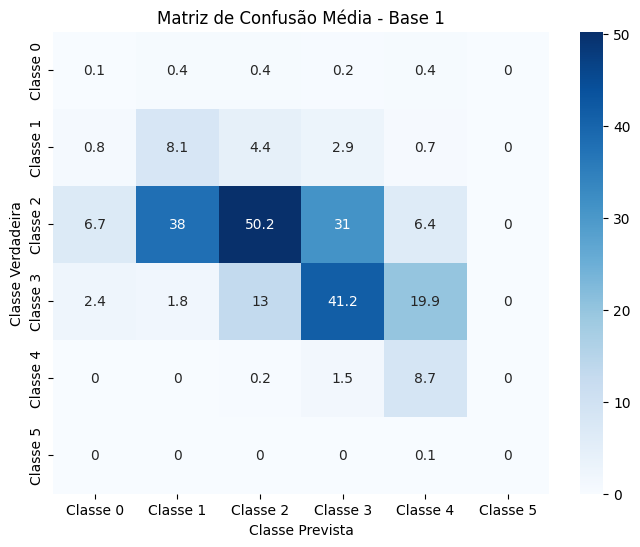

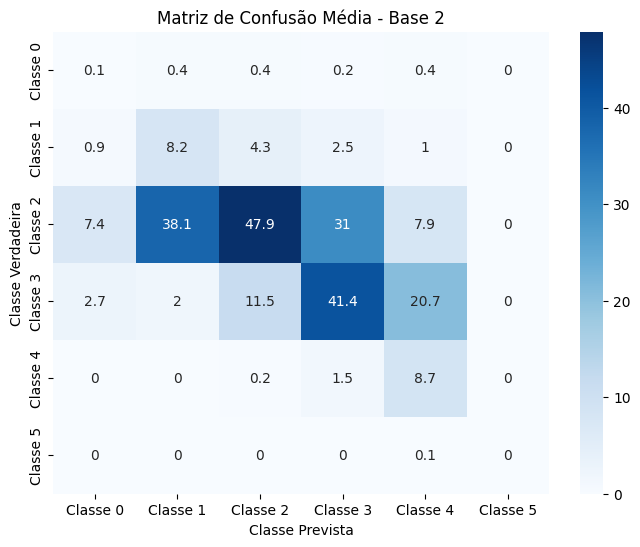

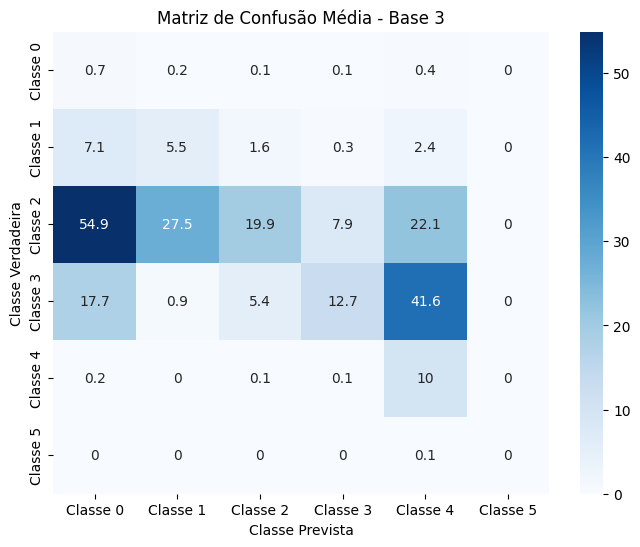

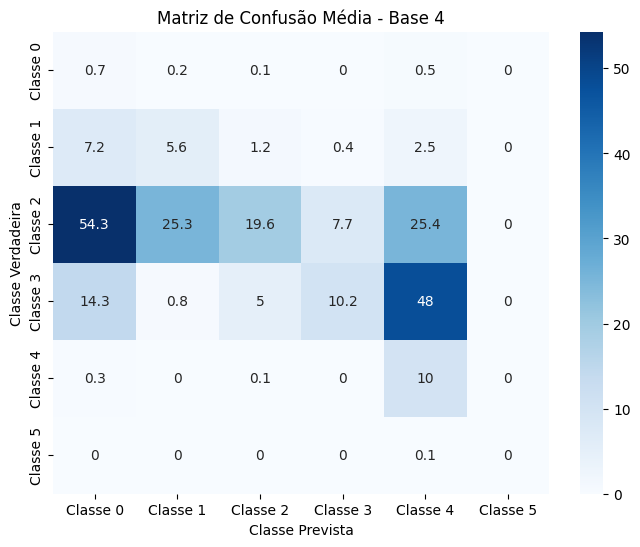


Resultados das métricas para cada base:
   Acurácia  Precisão  Revocação  Especificidade  F1-Score  \
0  0.817397  0.281760   0.381353        0.878170  0.278544   
1  0.814614  0.281172   0.379867        0.878185  0.273559   
2  0.734586  0.272789   0.344377        0.854305  0.161307   
3  0.730828  0.268582   0.339664        0.853040  0.152100   

   Taxa de Falsos Positivos  Taxa de Falsos Negativos  
0                  0.121830                  0.618647  
1                  0.121815                  0.620133  
2                  0.145695                  0.655623  
3                  0.146960                  0.660336  


In [300]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Função para plotar a matriz de confusão em uma tabela formatada
def plot_confusion_matrix(conf_matrix, classes, title='Matriz de Confusão', cmap=plt.cm.Blues):
    df_confusion = pd.DataFrame(conf_matrix, index=classes, columns=classes)

    plt.figure(figsize=(8, 6))
    sns.heatmap(df_confusion, annot=True, fmt='g', cmap=cmap)
    plt.title(title)
    plt.xlabel('Classe Prevista')
    plt.ylabel('Classe Verdadeira')
    plt.show()

# Função para calcular as métricas a partir da matriz de confusão
def calculate_metrics(conf_matrix):
    TP = np.diag(conf_matrix)
    FP = np.sum(conf_matrix, axis=0) - TP
    FN = np.sum(conf_matrix, axis=1) - TP
    TN = np.sum(conf_matrix) - (TP + FP + FN)

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    # Adicionado um valor epsilon para evitar divisão por zero
    precision = TP / (TP + FP + np.finfo(float).eps)
    recall = TP / (TP + FN + np.finfo(float).eps)
    specificity = TN / (TN + FP + np.finfo(float).eps)
    f1_score = 2 * (precision * recall) / (precision + recall + np.finfo(float).eps)
    fpr = FP / (TN + FP + np.finfo(float).eps)
    fnr = FN / (TP + FN + np.finfo(float).eps)

    return accuracy.mean(), precision.mean(), recall.mean(), specificity.mean(), f1_score.mean(), fpr.mean(), fnr.mean()

# Criando uma instância do classificador Naive Bayes (GaussianNB)
nb = GaussianNB()

# Definindo o número de folds desejados (por exemplo, k=2 para 10-Fold)
num_folds = 10

# Lista para armazenar os resultados das métricas para cada base
results = []

# Exemplo de nomes de classes (ajuste de acordo com as suas classes)
class_names = ['Classe 0', 'Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5']

# Loop para iterar sobre as quatro bases
for base_num in range(1, 5):
    # Criando uma instância do K-Fold para a Base X
    kf_baseX = KFold(n_splits=num_folds)

    # Iniciando lista para armazenar as matrizes de confusão para a Base X
    confusion_matrices_baseX = []

    # Separando os dados normalizados e rótulos discretos para a Base X
    X_train = globals()["X_train_base{}_norm".format(base_num)]
    X_test = globals()["X_test_base{}_norm".format(base_num)]
    y_train = globals()["y_train_base{}_discrete".format(base_num)]
    y_test = globals()["y_test_base{}_discrete".format(base_num)]

    # Loop para executar o K-Fold Cross Validation para a Base X
    for train_index, test_index in kf_baseX.split(X_train):
        # Separando os conjuntos de treinamento e teste para este fold
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

        # Treinando o modelo Naive Bayes para este fold
        nb.fit(X_train_fold, y_train_fold)

        # Fazendo previsões no conjunto de teste deste fold
        y_pred_fold = nb.predict(X_test_fold)

        # Calculando a matriz de confusão para este fold
        cm_fold = confusion_matrix(y_test_fold, y_pred_fold, labels=np.unique(y_train))

        # Ajustando o tamanho da matriz de confusão para o tamanho máximo possível
        max_classes = np.max(y_train) + 1
        cm_fold_adjusted = np.zeros((max_classes, max_classes))
        cm_fold_adjusted[:cm_fold.shape[0], :cm_fold.shape[1]] = cm_fold

        confusion_matrices_baseX.append(cm_fold_adjusted)

    # Calculando a matriz de confusão média para a Base X
    mean_cm_baseX = np.mean(confusion_matrices_baseX, axis=0)

    # Atualizar o class_names com base nas classes presentes na matriz de confusão
    class_names = [f'Classe {i}' for i in range(mean_cm_baseX.shape[0])]

    # Plotar a matriz de confusão média para a Base X
    plot_confusion_matrix(mean_cm_baseX, classes=class_names, title=f"Matriz de Confusão Média - Base {base_num}")

    # Calculando as métricas para a Base X
    accuracy, precision, recall, specificity, f1_score, fpr, fnr = calculate_metrics(mean_cm_baseX)

    # Armazenando os resultados das métricas na lista de resultados
    results.append((accuracy, precision, recall, specificity, f1_score, fpr, fnr))

# Criando um DataFrame com os resultados das métricas para cada base
df_results = pd.DataFrame(results, columns=['Acurácia', 'Precisão', 'Revocação', 'Especificidade', 'F1-Score', 'Taxa de Falsos Positivos', 'Taxa de Falsos Negativos'])

# Exibindo o DataFrame com os resultados
print("\nResultados das métricas para cada base:")
print(df_results)


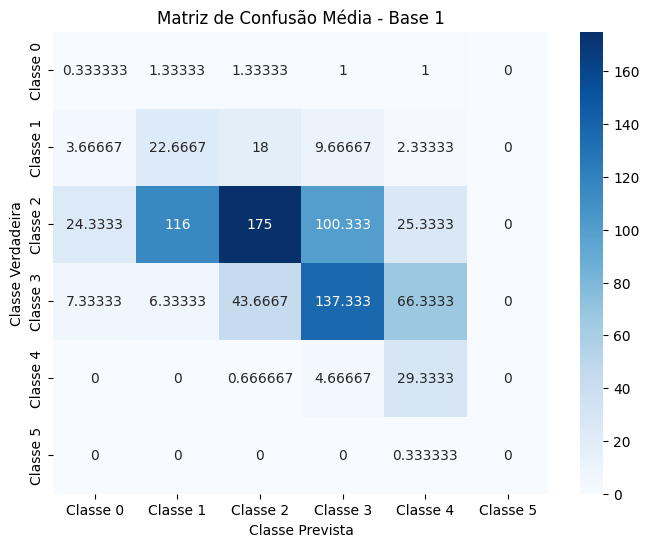

<ipython-input-301-496fef027039>:23: RuntimeWarning: invalid value encountered in true_divide
  precision = np.where(TP + FP == 0, 0, TP / (TP + FP))


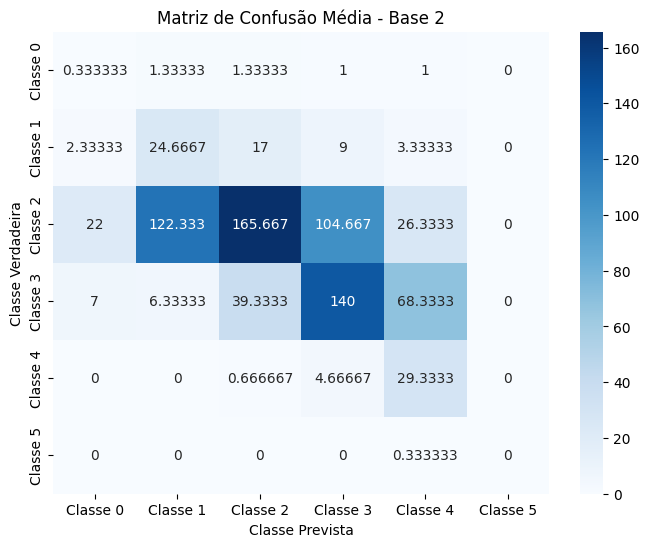

<ipython-input-301-496fef027039>:23: RuntimeWarning: invalid value encountered in true_divide
  precision = np.where(TP + FP == 0, 0, TP / (TP + FP))


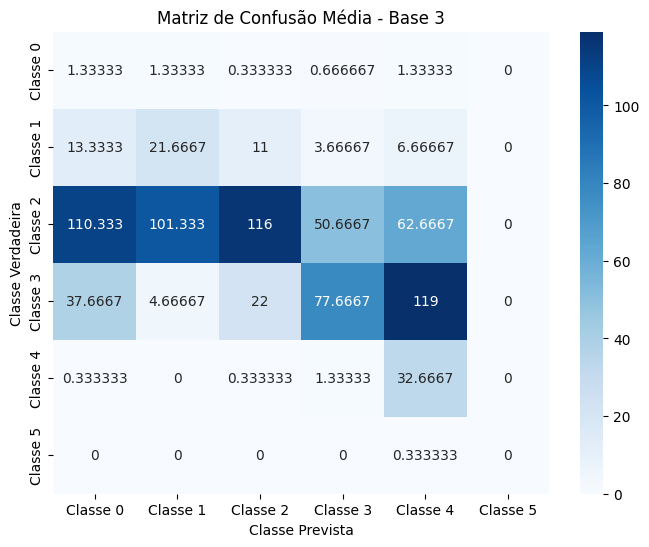

<ipython-input-301-496fef027039>:23: RuntimeWarning: invalid value encountered in true_divide
  precision = np.where(TP + FP == 0, 0, TP / (TP + FP))


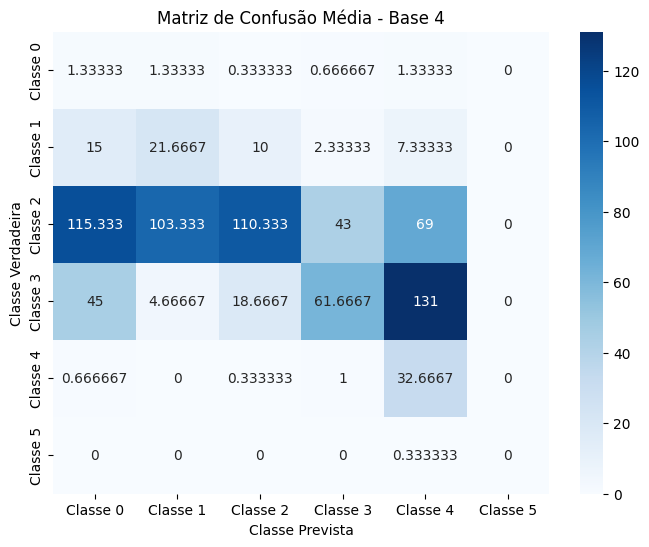


Resultados das métricas para cada base:
   Acurácia  Precisão  Revocação  Especificidade  F1-Score  \
0  0.818928  0.335119   0.447639        0.878421  0.331522   
1  0.816980  0.335483   0.452550        0.878316  0.329507   
2  0.770772  0.335501   0.430840        0.867285  0.257919   
3  0.761726  0.333109   0.416010        0.864594  0.239206   

   Taxa de Falsos Positivos  Taxa de Falsos Negativos  
0                  0.121579                  0.626968  
1                  0.121684                  0.622875  
2                  0.132715                  0.640966  
3                  0.135406                  0.653325  


<ipython-input-301-496fef027039>:23: RuntimeWarning: invalid value encountered in true_divide
  precision = np.where(TP + FP == 0, 0, TP / (TP + FP))


In [301]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Função para calcular as métricas a partir da matriz de confusão
# Função para calcular as métricas a partir da matriz de confusão
def calculate_metrics(conf_matrix):
    num_classes = conf_matrix.shape[0]

    TP = np.diag(conf_matrix)
    FP = np.sum(conf_matrix, axis=0) - TP
    FN = np.sum(conf_matrix, axis=1) - TP
    TN = np.sum(conf_matrix) - (TP + FP + FN)

    accuracy = (TP + TN) / (TP + TN + FP + FN)

    # Filtrar classes com TP + FP igual a zero
    valid_classes_precision = np.where(TP + FP != 0)
    precision = np.where(TP + FP == 0, 0, TP / (TP + FP))
    precision = precision[valid_classes_precision]

    # Filtrar classes com TP + FN igual a zero
    valid_classes_recall = np.where(TP + FN != 0)
    recall = np.where(TP + FN == 0, 0, TP / (TP + FN))
    recall = recall[valid_classes_recall]

    # Filtrar classes com precisão e recall válidos
    valid_classes = np.intersect1d(valid_classes_precision, valid_classes_recall)

    # Calcular as métricas finais
    precision = precision[valid_classes]
    recall = recall[valid_classes]
    specificity = np.where(TN + FP == 0, 0, TN / (TN + FP))
    f1_score = np.where(precision + recall == 0, 0, 2 * (precision * recall) / (precision + recall))
    fpr = np.where(TN + FP == 0, 0, FP / (TN + FP))
    fnr = np.where(TP + FN == 0, 0, FN / (TP + FN))

    return accuracy.mean(), precision.mean(), recall.mean(), specificity.mean(), f1_score.mean(), fpr.mean(), fnr.mean()

# Criando uma instância do classificador Naive Bayes (GaussianNB)
nb = GaussianNB()

# Definindo o número de folds desejados (por exemplo, k=3 para 10-Fold)
num_folds = 3

# Lista para armazenar os resultados das métricas para cada base
results = []

# Exemplo de nomes de classes (ajuste de acordo com as suas classes)
class_names = ['Classe 0', 'Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5']

# Loop para iterar sobre as quatro bases
for base_num in range(1, 5):
    # Criando uma instância do K-Fold para a Base X
    kf_baseX = KFold(n_splits=num_folds)

    # Iniciando lista para armazenar as matrizes de confusão para a Base X
    confusion_matrices_baseX = []

    # Separando os dados não normalizados e rótulos discretos para a Base X
    X_train = globals()["X_train_base{}".format(base_num)]
    X_test = globals()["X_test_base{}".format(base_num)]
    y_train = globals()["y_train_base{}_discrete".format(base_num)]
    y_test = globals()["y_test_base{}_discrete".format(base_num)]

    # Convertendo os dados para arrays numpy
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    # Loop para executar o K-Fold Cross Validation para a Base X
    for train_index, test_index in kf_baseX.split(X_train):
        # Separando os conjuntos de treinamento e teste para este fold
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

        # Treinando o modelo Naive Bayes para este fold
        nb.fit(X_train_fold, y_train_fold)

        # Fazendo previsões no conjunto de teste deste fold
        y_pred_fold = nb.predict(X_test_fold)

        # Calculando a matriz de confusão para este fold
        cm_fold = confusion_matrix(y_test_fold, y_pred_fold, labels=np.unique(y_train))

        # Ajustando o tamanho da matriz de confusão para o tamanho máximo possível
        max_classes = np.max(y_train) + 1
        cm_fold_adjusted = np.zeros((max_classes, max_classes))
        cm_fold_adjusted[:cm_fold.shape[0], :cm_fold.shape[1]] = cm_fold

        confusion_matrices_baseX.append(cm_fold_adjusted)

    # Calculando a matriz de confusão média para a Base X
    mean_cm_baseX = np.mean(confusion_matrices_baseX, axis=0)

    # Plotar a matriz de confusão média para a Base X
    df_confusion = pd.DataFrame(mean_cm_baseX, index=class_names, columns=class_names)
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_confusion, annot=True, fmt='g', cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusão Média - Base {base_num}")
    plt.xlabel('Classe Prevista')
    plt.ylabel('Classe Verdadeira')
    plt.show()

    # Calculando as métricas para a Base X
    accuracy, precision, recall, specificity, f1_score, fpr, fnr = calculate_metrics(mean_cm_baseX)

    # Armazenando os resultados das métricas na lista de resultados
    results.append((accuracy, precision, recall, specificity, f1_score, fpr, fnr))

# Criando um DataFrame com os resultados das métricas para cada base
df_results = pd.DataFrame(results, columns=['Acurácia', 'Precisão', 'Revocação', 'Especificidade', 'F1-Score', 'Taxa de Falsos Positivos', 'Taxa de Falsos Negativos'])

# Exibindo o DataFrame com os resultados
print("\nResultados das métricas para cada base:")
print(df_results)


Realizando um teste com o Random forest pois em rodadas anteriores de estudo desta base de dados foi o método de melhor resultado.

In [302]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Lista das bases de dados e seus nomes
bases = [(X_train_base1, y_train_base1, X_test_base1, y_test_base1, "Base 1"),
         (X_train_base2, y_train_base2, X_test_base2, y_test_base2, "Base 2"),
         (X_train_base3, y_train_base3, X_test_base3, y_test_base3, "Base 3"),
         (X_train_base4, y_train_base4, X_test_base4, y_test_base4, "Base 4")]

# Configurações da validação cruzada K-Fold
n_splits = 5
random_state = 42

for X_train, y_train, X_test, y_test, base_name in bases:
    print(f"--- {base_name} ---")
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    mse_scores = []
    r2_scores = []

    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Criar e treinar o modelo Random Forest
        rf_model = RandomForestRegressor(random_state=random_state)
        rf_model.fit(X_train_fold, y_train_fold)

        # Fazer previsões no conjunto de validação
        y_pred_fold = rf_model.predict(X_val_fold)

        # Calcular o erro médio quadrático (MSE) para a iteração atual
        mse_fold = mean_squared_error(y_val_fold, y_pred_fold)
        mse_scores.append(mse_fold)

        # Calcular o R² para a iteração atual
        r2_fold = r2_score(y_val_fold, y_pred_fold)
        r2_scores.append(r2_fold)

    # Calcular a média e desvio padrão dos scores de MSE e R²
    mse_mean = np.mean(mse_scores)
    mse_std = np.std(mse_scores)
    r2_mean = np.mean(r2_scores)
    r2_std = np.std(r2_scores)

    print(f"Média MSE: {mse_mean}")
    print(f"Desvio Padrão MSE: {mse_std}")
    print(f"Média R²: {r2_mean}")
    print(f"Desvio Padrão R²: {r2_std}")

--- Base 1 ---
Média MSE: 277.85964189001254
Desvio Padrão MSE: 29.912118859136875
Média R²: 0.5792131896428043
Desvio Padrão R²: 0.044125255298673144
--- Base 2 ---
Média MSE: 277.21609313962
Desvio Padrão MSE: 35.68049772595726
Média R²: 0.5803100163980541
Desvio Padrão R²: 0.051295672971412444
--- Base 3 ---
Média MSE: 272.16546001125687
Desvio Padrão MSE: 34.412488806734174
Média R²: 0.5876415571172484
Desvio Padrão R²: 0.05203616288097618
--- Base 4 ---
Média MSE: 272.3295204337662
Desvio Padrão MSE: 35.98534987060225
Média R²: 0.5873985916577886
Desvio Padrão R²: 0.05423803409885505


Conclusão: Quando comparado os modelos, a árvore de decisão apresentou resultados muito inferiores ao KNN e o Naive Bayes. Qundo os dois últimos métodos foram avaliados considerando a matriz de confusão.

Embora tenhamos tido resultados fora do esperado para Precisão e Taxa de Falsos negativos o modelo ainda seria útil uma vez que este não tem a intenção de acertar o valor a ser produzido mas minimizar escolhar erradas em diversos parâmetros com interferências entre si.

# Avalianda outro parâmetro a não ser produção para direcionamento do modelo.

In [303]:
# Verificando todas as correlações importantes
correlacao = merged_df.corr()

colunas_filtradas = correlacao[abs(correlacao['PRODUCT WEIGHT S207 (t/h)']) > 0.3]
#colunas_filtradas = colunas_filtradas.drop('PRODUCT WEIGHT S207 (t/h)')

# Display the filtered columns
print(colunas_filtradas)


                                             BED DEPTH CONTROL SETPOINT (mm)  \
  BED DEPTH CONTROL SETPOINT (mm)                                   1.000000   
PRODUCT WEIGHT S207 (t/h)                                           0.417884   
2# Iron ore feed rate(t/h)                                          0.364793   
6# Lime stone feed rate(t/h)                                       -0.295107   
7# Lime stone feed rate(t/h)                                        0.136122   
14A# Burnt lime feed rate(t/h)                                      0.412721   
14B# Burnt lime feed rate(t/h)                                      0.443665   
102 FEEDER MOISTRUE SETPOINT(%)                                     0.369386   
103 FEEDER MOISTRUE SETPOINT(%)                                    -0.424903   
105 FEEDER MOISTRUE SETPOINT(%)                                    -0.428996   
106 FEEDER MOISTRUE SETPOINT(%)                                    -0.453870   
107 FEEDER MOISTRUE SETPOINT(%)         

<ipython-input-303-5c3f94b18fd7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = merged_df.corr()


Avalianda as correlações o Tx_agua_total da mistura torne-se um parametro relevante quando avalido com os demais atributos porém ele mesmo não possui uma forte correlação com a produção. Inicialmente iremos apenas substituir a produção pela tx de água adicionada no sistema como target na intenção de mais tarde podermos estimar a água a ser adicionada nos misturadores em função do vomule massico da S201 e a umidade da mistura.

In [304]:
# Dividindo df_base(1,2,3 e 4) em conjunto de treinamento e teste
# Primeiro dividiremos as bases em treino e teste para somente após reallizar a normalização e a discretização dos dados.
from sklearn.model_selection import train_test_split

X_train_base1, X_test_base1, y_train_base1, y_test_base1 = train_test_split(
    df_base1.drop(columns=['Tx_agua_total']),
    df_base1['Tx_agua_total'],
    test_size=0.2, random_state=42
)

X_train_base2, X_test_base2, y_train_base2, y_test_base2 = train_test_split(
    df_base2.drop(columns=['Tx_agua_total']),
    df_base2['Tx_agua_total'],
    test_size=0.2, random_state=42
)

X_train_base3, X_test_base3, y_train_base3, y_test_base3 = train_test_split(
    df_base3.drop(columns=['Tx_agua_total']),
    df_base3['Tx_agua_total'],
    test_size=0.2, random_state=42
)

X_train_base4, X_test_base4, y_train_base4, y_test_base4 = train_test_split(
    df_base4.drop(columns=['Tx_agua_total']),
    df_base4['Tx_agua_total'],
    test_size=0.2, random_state=42
)

In [305]:
# Normalizando os dados de treinamento e teste para cada base de dados

from sklearn.preprocessing import MinMaxScaler

# Criando uma instância do MinMaxScaler
scaler = MinMaxScaler()

# Base 1
X_train_base1_norm = scaler.fit_transform(X_train_base1)
X_test_base1_norm = scaler.transform(X_test_base1)

# Base 2
X_train_base2_norm = scaler.fit_transform(X_train_base2)
X_test_base2_norm = scaler.transform(X_test_base2)

# Base 3
X_train_base3_norm = scaler.fit_transform(X_train_base3)
X_test_base3_norm = scaler.transform(X_test_base3)

# Base 4
X_train_base4_norm = scaler.fit_transform(X_train_base4)
X_test_base4_norm = scaler.transform(X_test_base4)

In [306]:
# Convertendo os valores contínuos em rótulos discretos com base nas faixas

import numpy as np
# Definindo as faixas para cada base de dados
faixas = [0.011042, 0.022542, 0.034042, 0.045542, 0.057042]

def discretizar_faixas(y, faixas):
    return np.digitize(y, faixas)

# Definindo os rótulos para cada base de dados
y_train_base1_discrete = discretizar_faixas(y_train_base1, faixas)
y_test_base1_discrete = discretizar_faixas(y_test_base1, faixas)

y_train_base2_discrete = discretizar_faixas(y_train_base2, faixas)
y_test_base2_discrete = discretizar_faixas(y_test_base2, faixas)

y_train_base3_discrete = discretizar_faixas(y_train_base3, faixas)
y_test_base3_discrete = discretizar_faixas(y_test_base3, faixas)

y_train_base4_discrete = discretizar_faixas(y_train_base4, faixas)
y_test_base4_discrete = discretizar_faixas(y_test_base4, faixas)

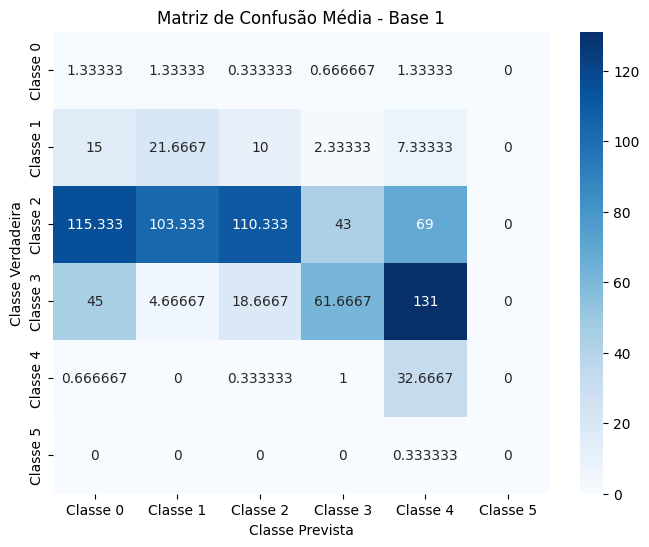

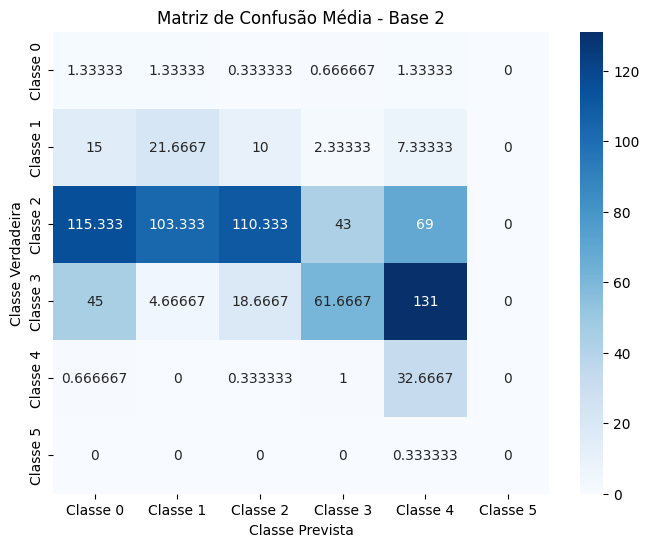

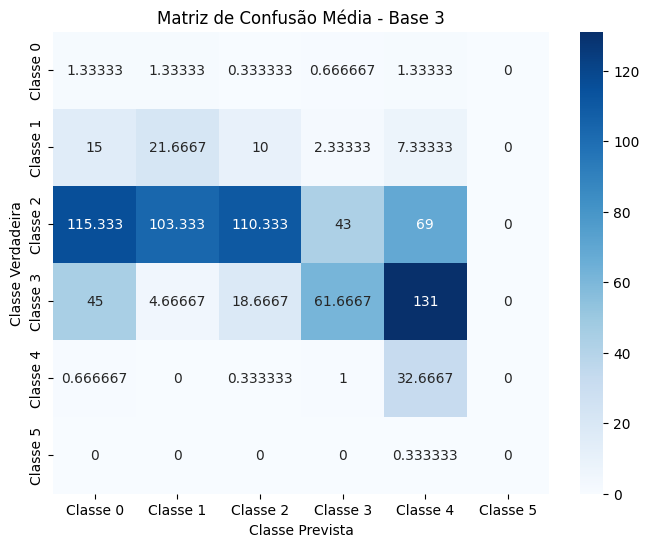

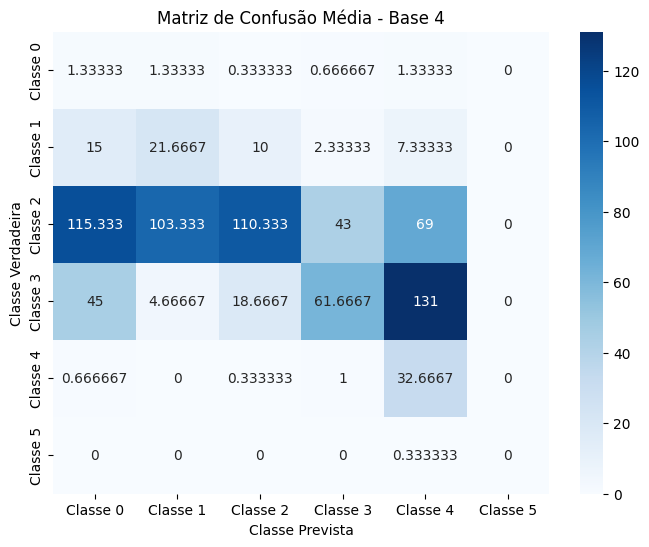


Resultados das métricas para cada base:
   Acurácia  Precisão  Revocação  Especificidade  F1-Score  \
0  0.761726  0.277591   0.346675        0.864594  0.199338   
1  0.761726  0.277591   0.346675        0.864594  0.199338   
2  0.761726  0.277591   0.346675        0.864594  0.199338   
3  0.761726  0.277591   0.346675        0.864594  0.199338   

   Taxa de Falsos Positivos  Taxa de Falsos Negativos  
0                  0.135406                  0.653325  
1                  0.135406                  0.653325  
2                  0.135406                  0.653325  
3                  0.135406                  0.653325  


In [307]:
# Rodando o KNN para água total como target
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Função para plotar a matriz de confusão em uma tabela formatada
def plot_confusion_matrix(conf_matrix, classes, title='Matriz de Confusão', cmap=plt.cm.Blues):
    df_confusion = pd.DataFrame(conf_matrix, index=classes, columns=classes)

    plt.figure(figsize=(8, 6))
    sns.heatmap(df_confusion, annot=True, fmt='g', cmap=cmap)
    plt.title(title)
    plt.xlabel('Classe Prevista')
    plt.ylabel('Classe Verdadeira')
    plt.show()

# Função para calcular as métricas a partir da matriz de confusão
def calculate_metrics(conf_matrix):
    TP = np.diag(conf_matrix)
    FP = np.sum(conf_matrix, axis=0) - TP
    FN = np.sum(conf_matrix, axis=1) - TP
    TN = np.sum(conf_matrix) - (TP + FP + FN)

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    # Adicionado um valor epsilon para evitar divisão por zero
    precision = TP / (TP + FP + np.finfo(float).eps)
    recall = TP / (TP + FN + np.finfo(float).eps)
    specificity = TN / (TN + FP + np.finfo(float).eps)
    f1_score = 2 * (precision * recall) / (precision + recall + np.finfo(float).eps)
    fpr = FP / (TN + FP + np.finfo(float).eps)
    fnr = FN / (TP + FN + np.finfo(float).eps)

    return accuracy.mean(), precision.mean(), recall.mean(), specificity.mean(), f1_score.mean(), fpr.mean(), fnr.mean()

# Criando uma instância do classificador KNN com k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Definindo o número de folds desejados
num_folds = 10

# Lista para armazenar os resultados das métricas para cada base
results = []

# Exemplo de nomes de classes (ajuste de acordo com as suas classes)
class_names = ['Classe 0', 'Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5']

# Loop para iterar sobre as quatro bases
for base_num in range(1, 5):
    # Criando uma instância do K-Fold para a Base X
    kf_baseX = KFold(n_splits=num_folds)

    # Iniciando lista para armazenar as matrizes de confusão para a Base X
    confusion_matrices_baseX = []

    # Separando os dados normalizados e rótulos discretos para a Base X
    X_train = globals()["X_train_base{}_norm".format(base_num)]
    X_test = globals()["X_test_base{}_norm".format(base_num)]
    y_train = globals()["y_train_base{}_discrete".format(base_num)]
    y_test = globals()["y_test_base{}_discrete".format(base_num)]

    # Loop para executar o K-Fold Cross Validation para a Base X
    for train_index, test_index in kf_baseX.split(X_train):
        # Separando os conjuntos de treinamento e teste para este fold
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

        # Treinando o modelo KNN para este fold
        knn.fit(X_train_fold, y_train_fold)

        # Fazendo previsões no conjunto de teste deste fold
        y_pred_fold = knn.predict(X_test_fold)

        # Calculando a matriz de confusão para este fold
        cm_fold = confusion_matrix(y_test_fold, y_pred_fold, labels=np.unique(y_train))

        # Ajustando o tamanho da matriz de confusão para o tamanho máximo possível
        max_classes = np.max(y_train) + 1
        cm_fold_adjusted = np.zeros((max_classes, max_classes))
        cm_fold_adjusted[:cm_fold.shape[0], :cm_fold.shape[1]] = cm_fold

        confusion_matrices_baseX.append(cm_fold_adjusted)

    # Calculando as métricas para a Base X
    accuracy, precision, recall, specificity, f1_score, fpr, fnr = calculate_metrics(mean_cm_baseX)

    # Armazenando os resultados das métricas na lista de resultados
    results.append((accuracy, precision, recall, specificity, f1_score, fpr, fnr))

    # Plotar a matriz de confusão média para a Base X
    plot_confusion_matrix(mean_cm_baseX, classes=class_names, title=f"Matriz de Confusão Média - Base {base_num}")

# Criando um DataFrame com os resultados das métricas para cada base
df_results = pd.DataFrame(results, columns=['Acurácia', 'Precisão', 'Revocação', 'Especificidade', 'F1-Score', 'Taxa de Falsos Positivos', 'Taxa de Falsos Negativos'])

# Exibindo o DataFrame com os resultados
print("\nResultados das métricas para cada base:")
print(df_results)

In [308]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Lista das bases de dados e seus nomes
bases = [(X_train_base1, y_train_base1, X_test_base1, y_test_base1, "Base 1"),
         (X_train_base2, y_train_base2, X_test_base2, y_test_base2, "Base 2"),
         (X_train_base3, y_train_base3, X_test_base3, y_test_base3, "Base 3"),
         (X_train_base4, y_train_base4, X_test_base4, y_test_base4, "Base 4")]

# Configurações da validação cruzada K-Fold
n_splits = 5
random_state = 42

for X_train, y_train, X_test, y_test, base_name in bases:
    print(f"--- {base_name} ---")
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    mse_scores = []
    r2_scores = []

    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Criar e treinar o modelo Random Forest
        rf_model = RandomForestRegressor(random_state=random_state)
        rf_model.fit(X_train_fold, y_train_fold)

        # Fazer previsões no conjunto de validação
        y_pred_fold = rf_model.predict(X_val_fold)

        # Calcular o erro médio quadrático (MSE) para a iteração atual
        mse_fold = mean_squared_error(y_val_fold, y_pred_fold)
        mse_scores.append(mse_fold)

        # Calcular o R² para a iteração atual
        r2_fold = r2_score(y_val_fold, y_pred_fold)
        r2_scores.append(r2_fold)

    # Calcular a média e desvio padrão dos scores de MSE e R²
    mse_mean = np.mean(mse_scores)
    mse_std = np.std(mse_scores)
    r2_mean = np.mean(r2_scores)
    r2_std = np.std(r2_scores)

    print(f"Média MSE: {mse_mean}")
    print(f"Desvio Padrão MSE: {mse_std}")
    print(f"Média R²: {r2_mean}")
    print(f"Desvio Padrão R²: {r2_std}")

--- Base 1 ---
Média MSE: 1.8665408667499666e-07
Desvio Padrão MSE: 4.9831121236189413e-08
Média R²: 0.9989768785316248
Desvio Padrão R²: 0.00027714874098231713
--- Base 2 ---
Média MSE: 1.83432900422767e-07
Desvio Padrão MSE: 4.8390888272928366e-08
Média R²: 0.9989941424789723
Desvio Padrão R²: 0.00027128412640974064
--- Base 3 ---
Média MSE: 1.8896961589546757e-07
Desvio Padrão MSE: 4.766038391756586e-08
Média R²: 0.9989644383518353
Desvio Padrão R²: 0.0002635409763477652
--- Base 4 ---
Média MSE: 1.898960929871538e-07
Desvio Padrão MSE: 4.874071209011551e-08
Média R²: 0.9989585532373881
Desvio Padrão R²: 0.00027345539292256214


# Teste Similar porém agora iremos utlizar apenas os valores os atributos de maior correlação



In [309]:
# Variáveis de Processo
V_processo = [
    'PRODUCT WEIGHT S207 (t/h)','  BED DEPTH CONTROL SETPOINT (mm)','Pyrometer TCM203(Deg C)'
]

In [310]:
# Variáveis da Mistura
V_mistura =['102 FEEDER MOISTRUE SETPOINT(%)','103 FEEDER MOISTRUE SETPOINT(%)','105 FEEDER MOISTRUE SETPOINT(%)','106 FEEDER MOISTRUE SETPOINT(%)','107 FEEDER MOISTRUE SETPOINT(%)']


In [311]:
# Taxa de adição de água
Tx_agua = ['Tx_primario', 'Tx_secundario', 'Tx_agua_total']

In [312]:
# Variáveis Químicas
V_quimica = ['Al2O3 MHVB','MgO MHVB','P MHVB','FeO MHVB','PPC MHVB']

In [313]:
# Variáveis Granulométricas (% retido em cada malha)
V_gran = ['8,00 MHVB','6,30 MHVB','4,75 MHVB','2,80 MHVB','2,00 MHVB','1,00 MHVB','0,250 MHVB',
          '0,150 MHVB','FUNDO MHVB']

In [314]:
# Faixas granulométricas
Faixas =  ['>2,80 MHVB', '>1,00 MHVB','<0,045 MHVB']

In [315]:
# Classes de MP
classe_MP = ['LXIN', 'MCJM', 'MCLGA AC', 'MFBU1', 'MFLGA VL', 'MFMTP', 'MFVL', 'MFVA', 'MCLGA VLN', 'MFIB', 'MFSMB', 'MFBU 2', 'MFLGAVLN', 'MFVO',
             'MFSAFM', 'MFGG', 'MPBU', 'MPBU2', 'MCLGA HT', 'MFBE', 'MFPV', 'MCLGA MC VL', 'MFLGA HT', 'MCSAFM', 'MPSS', 'MFBE T2', 'MFVL SEMIL','MCAVG']

In [316]:
# definindo as bases de dados
#Base1 {Variáveis de Processo,Variáveis da Mistura,As taxas de adição de água,Variáveis Químicas,Variáveis Granulométricas}
df_base1 = merged_df[V_processo + V_mistura + Tx_agua + V_quimica + V_gran]
#Base2 {Variáveis de Processo,Variáveis da Mistura,As taxas de adição de água,Variáveis Químicas,Faixas granulométricas}
df_base2 = merged_df[V_processo + V_mistura + Tx_agua + V_quimica + Faixas]
#Base3 {Variáveis de Processo,Variáveis da Mistura,As taxas de adição de água,Classe das MP,Variáveis Granulométricas}
df_base3 = merged_df[V_processo + V_mistura + Tx_agua + classe_MP + V_gran]
#Base4 {Variáveis de Processo,Variáveis da Mistura,As taxas de adição de água,Classe das MP,Faixas granulométricas}
df_base4 = merged_df[V_processo + V_mistura + Tx_agua + classe_MP + Faixas]



In [317]:
# Dividindo df_base(1,2,3 e 4) em conjunto de treinamento e teste
# Primeiro dividiremos as bases em treino e teste para somente após reallizar a normalização e a discretização dos dados.
from sklearn.model_selection import train_test_split

X_train_base1, X_test_base1, y_train_base1, y_test_base1 = train_test_split(
    df_base1.drop(columns=['Tx_agua_total']),
    df_base1['Tx_agua_total'],
    test_size=0.2, random_state=42
)

X_train_base2, X_test_base2, y_train_base2, y_test_base2 = train_test_split(
    df_base2.drop(columns=['Tx_agua_total']),
    df_base2['Tx_agua_total'],
    test_size=0.2, random_state=42
)

X_train_base3, X_test_base3, y_train_base3, y_test_base3 = train_test_split(
    df_base3.drop(columns=['Tx_agua_total']),
    df_base3['Tx_agua_total'],
    test_size=0.2, random_state=42
)

X_train_base4, X_test_base4, y_train_base4, y_test_base4 = train_test_split(
    df_base4.drop(columns=['Tx_agua_total']),
    df_base4['Tx_agua_total'],
    test_size=0.2, random_state=42
)

In [318]:
# Normalizando os dados de treinamento e teste para cada base de dados

from sklearn.preprocessing import MinMaxScaler

# Criando uma instância do MinMaxScaler
scaler = MinMaxScaler()

# Base 1
X_train_base1_norm = scaler.fit_transform(X_train_base1)
X_test_base1_norm = scaler.transform(X_test_base1)

# Base 2
X_train_base2_norm = scaler.fit_transform(X_train_base2)
X_test_base2_norm = scaler.transform(X_test_base2)

# Base 3
X_train_base3_norm = scaler.fit_transform(X_train_base3)
X_test_base3_norm = scaler.transform(X_test_base3)

# Base 4
X_train_base4_norm = scaler.fit_transform(X_train_base4)
X_test_base4_norm = scaler.transform(X_test_base4)

In [319]:
# Convertendo os valores contínuos em rótulos discretos com base nas faixas

import numpy as np
# Definindo as faixas para cada base de dados
faixas = [0.011042, 0.022542, 0.034042, 0.045542, 0.057042]

def discretizar_faixas(y, faixas):
    return np.digitize(y, faixas)

# Definindo os rótulos para cada base de dados
y_train_base1_discrete = discretizar_faixas(y_train_base1, faixas)
y_test_base1_discrete = discretizar_faixas(y_test_base1, faixas)

y_train_base2_discrete = discretizar_faixas(y_train_base2, faixas)
y_test_base2_discrete = discretizar_faixas(y_test_base2, faixas)

y_train_base3_discrete = discretizar_faixas(y_train_base3, faixas)
y_test_base3_discrete = discretizar_faixas(y_test_base3, faixas)

y_train_base4_discrete = discretizar_faixas(y_train_base4, faixas)
y_test_base4_discrete = discretizar_faixas(y_test_base4, faixas)

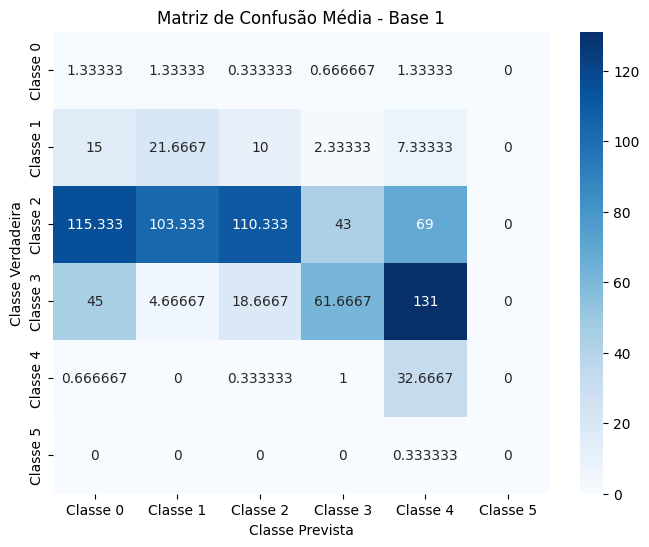

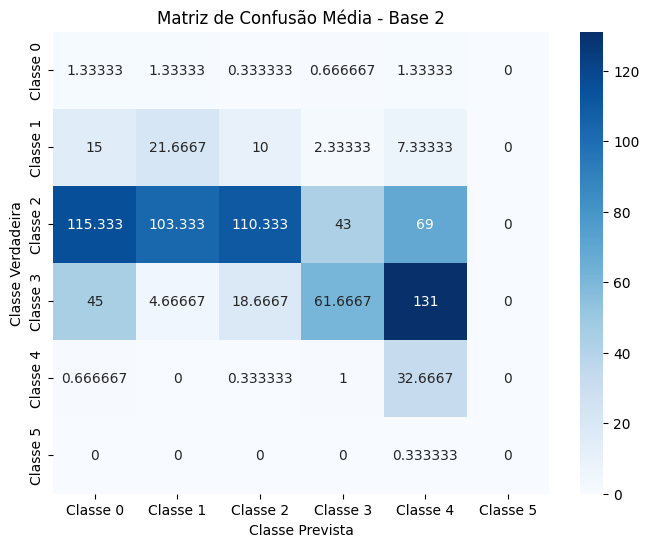

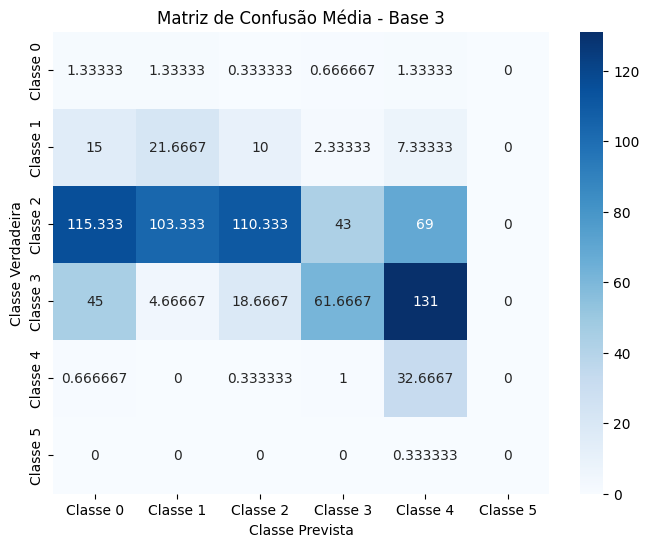

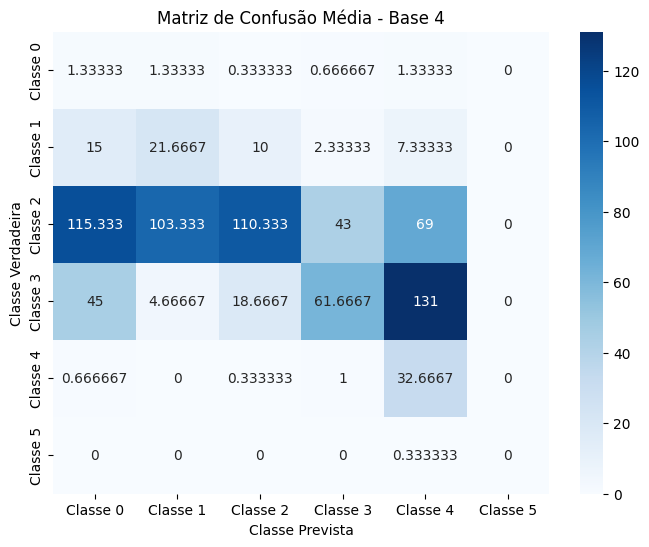


Resultados das métricas para cada base:
   Acurácia  Precisão  Revocação  Especificidade  F1-Score  \
0  0.761726  0.277591   0.346675        0.864594  0.199338   
1  0.761726  0.277591   0.346675        0.864594  0.199338   
2  0.761726  0.277591   0.346675        0.864594  0.199338   
3  0.761726  0.277591   0.346675        0.864594  0.199338   

   Taxa de Falsos Positivos  Taxa de Falsos Negativos  
0                  0.135406                  0.653325  
1                  0.135406                  0.653325  
2                  0.135406                  0.653325  
3                  0.135406                  0.653325  


In [320]:
# Rodando o KNN para água total como target
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Função para plotar a matriz de confusão em uma tabela formatada
def plot_confusion_matrix(conf_matrix, classes, title='Matriz de Confusão', cmap=plt.cm.Blues):
    df_confusion = pd.DataFrame(conf_matrix, index=classes, columns=classes)

    plt.figure(figsize=(8, 6))
    sns.heatmap(df_confusion, annot=True, fmt='g', cmap=cmap)
    plt.title(title)
    plt.xlabel('Classe Prevista')
    plt.ylabel('Classe Verdadeira')
    plt.show()

# Função para calcular as métricas a partir da matriz de confusão
def calculate_metrics(conf_matrix):
    TP = np.diag(conf_matrix)
    FP = np.sum(conf_matrix, axis=0) - TP
    FN = np.sum(conf_matrix, axis=1) - TP
    TN = np.sum(conf_matrix) - (TP + FP + FN)

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    # Adicionado um valor epsilon para evitar divisão por zero
    precision = TP / (TP + FP + np.finfo(float).eps)
    recall = TP / (TP + FN + np.finfo(float).eps)
    specificity = TN / (TN + FP + np.finfo(float).eps)
    f1_score = 2 * (precision * recall) / (precision + recall + np.finfo(float).eps)
    fpr = FP / (TN + FP + np.finfo(float).eps)
    fnr = FN / (TP + FN + np.finfo(float).eps)

    return accuracy.mean(), precision.mean(), recall.mean(), specificity.mean(), f1_score.mean(), fpr.mean(), fnr.mean()

# Criando uma instância do classificador KNN com k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Definindo o número de folds desejados
num_folds = 2

# Lista para armazenar os resultados das métricas para cada base
results = []

# Exemplo de nomes de classes (ajuste de acordo com as suas classes)
class_names = ['Classe 0', 'Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5']

# Loop para iterar sobre as quatro bases
for base_num in range(1, 5):
    # Criando uma instância do K-Fold para a Base X
    kf_baseX = KFold(n_splits=num_folds)

    # Iniciando lista para armazenar as matrizes de confusão para a Base X
    confusion_matrices_baseX = []

    # Separando os dados normalizados e rótulos discretos para a Base X
    X_train = globals()["X_train_base{}_norm".format(base_num)]
    X_test = globals()["X_test_base{}_norm".format(base_num)]
    y_train = globals()["y_train_base{}_discrete".format(base_num)]
    y_test = globals()["y_test_base{}_discrete".format(base_num)]

    # Loop para executar o K-Fold Cross Validation para a Base X
    for train_index, test_index in kf_baseX.split(X_train):
        # Separando os conjuntos de treinamento e teste para este fold
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

        # Treinando o modelo KNN para este fold
        knn.fit(X_train_fold, y_train_fold)

        # Fazendo previsões no conjunto de teste deste fold
        y_pred_fold = knn.predict(X_test_fold)

        # Calculando a matriz de confusão para este fold
        cm_fold = confusion_matrix(y_test_fold, y_pred_fold, labels=np.unique(y_train))

        # Ajustando o tamanho da matriz de confusão para o tamanho máximo possível
        max_classes = np.max(y_train) + 1
        cm_fold_adjusted = np.zeros((max_classes, max_classes))
        cm_fold_adjusted[:cm_fold.shape[0], :cm_fold.shape[1]] = cm_fold

        confusion_matrices_baseX.append(cm_fold_adjusted)

    # Calculando as métricas para a Base X
    accuracy, precision, recall, specificity, f1_score, fpr, fnr = calculate_metrics(mean_cm_baseX)

    # Armazenando os resultados das métricas na lista de resultados
    results.append((accuracy, precision, recall, specificity, f1_score, fpr, fnr))

    # Plotar a matriz de confusão média para a Base X
    plot_confusion_matrix(mean_cm_baseX, classes=class_names, title=f"Matriz de Confusão Média - Base {base_num}")

# Criando um DataFrame com os resultados das métricas para cada base
df_results = pd.DataFrame(results, columns=['Acurácia', 'Precisão', 'Revocação', 'Especificidade', 'F1-Score', 'Taxa de Falsos Positivos', 'Taxa de Falsos Negativos'])

# Exibindo o DataFrame com os resultados
print("\nResultados das métricas para cada base:")
print(df_results)

# Testando um Randon Forest

In [321]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Lista das bases de dados e seus nomes
bases = [(X_train_base1, y_train_base1, X_test_base1, y_test_base1, "Base 1"),
         (X_train_base2, y_train_base2, X_test_base2, y_test_base2, "Base 2"),
         (X_train_base3, y_train_base3, X_test_base3, y_test_base3, "Base 3"),
         (X_train_base4, y_train_base4, X_test_base4, y_test_base4, "Base 4")]

# Configurações da validação cruzada K-Fold
n_splits = 5
random_state = 42

for X_train, y_train, X_test, y_test, base_name in bases:
    print(f"--- {base_name} ---")
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    mse_scores = []
    r2_scores = []

    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Criar e treinar o modelo Random Forest
        rf_model = RandomForestRegressor(random_state=random_state)
        rf_model.fit(X_train_fold, y_train_fold)

        # Fazer previsões no conjunto de validação
        y_pred_fold = rf_model.predict(X_val_fold)

        # Calcular o erro médio quadrático (MSE) para a iteração atual
        mse_fold = mean_squared_error(y_val_fold, y_pred_fold)
        mse_scores.append(mse_fold)

        # Calcular o R² para a iteração atual
        r2_fold = r2_score(y_val_fold, y_pred_fold)
        r2_scores.append(r2_fold)

    # Calcular a média e desvio padrão dos scores de MSE e R²
    mse_mean = np.mean(mse_scores)
    mse_std = np.std(mse_scores)
    r2_mean = np.mean(r2_scores)
    r2_std = np.std(r2_scores)

    print(f"Média MSE: {mse_mean}")
    print(f"Desvio Padrão MSE: {mse_std}")
    print(f"Média R²: {r2_mean}")
    print(f"Desvio Padrão R²: {r2_std}")


--- Base 1 ---
Média MSE: 1.7046073888938942e-07
Desvio Padrão MSE: 4.998957275658099e-08
Média R²: 0.9990659784324428
Desvio Padrão R²: 0.00027745303574064654
--- Base 2 ---
Média MSE: 1.6628397905922514e-07
Desvio Padrão MSE: 4.671249859470527e-08
Média R²: 0.9990882497120733
Desvio Padrão R²: 0.00026196716717735697
--- Base 3 ---
Média MSE: 1.7603783115605036e-07
Desvio Padrão MSE: 4.962719912970846e-08
Média R²: 0.999035650585698
Desvio Padrão R²: 0.0002751674198997557
--- Base 4 ---
Média MSE: 1.7221501098983126e-07
Desvio Padrão MSE: 4.701590369609206e-08
Média R²: 0.999056534606175
Desvio Padrão R²: 0.0002598275151437809


Colclusão Final:Ficou claro que a preparação dos dados para serem utilizada em cada modelo é e extremamente imporatnte para a obtenção do resultado do aprendizado de máquina. Está claro também que para cada tipo de problema teremos um método mais adequado que ajuste aquela classe de dados e quantidade de atributos. A correta escolha do target e das futures também são decisivas para este processo. Para continuidade deste trabalho a idéia é fazer com que este modelo sugira o melhor valor de água para o processo baseando em informações dinâmicas de entrada.